Антон или Екатерина, привет!\
Работа далеко неполная. Делаю медленно и глубоко вникаю в суть данных. Походу, самая черепашья работа. \
Я мог бы сразу на второй день побежать в RFM анализ и дальше по списку задач, толком ничего не понимая, но таким я не занимаюсь.\
По структуре данных стало ясно, пожалуй, абсолютно всё, кроме одной детали: что значит колонка `CustomerChangeDateTimeUtc (Дата регистрации / редактирования)`. У меня это `registration_or_redaction_date` в `donors_df`.\
Также ещё неясно, почему столько много пожертвований из Австрии, Вены? Похоже на какую-то ошибку.

Ситуация по полноте работы +/- похожая как в январской Мастерской Авторынка Казахстана. Тогда я сдавал тоже далеко не полную работу. С тех пор она сильно изменилась. [**Этот проект здесь.**](https://github.com/SweexFox/portfolio-projects/tree/main/python-projects/7-kz-car-market)

## Введение

**О заказчике**

Мы имеем данные благотворительного фонда [«Доброе сердце»](https://dobroe.aif.ru/about-us/).

Фонд «АиФ Доброе сердце» работает с $2005$ года по инициативе газеты «Аргументы и факты».\
За почти $20$ лет работы более $10$ тысяч подопечных со сложными диагнозами получили помощь оплатой лечения, лекарств и медобслуживания.

<br>

**Цель и задачи**

<span style="font-weight: 600">Цель — благотворительный фонд хочет лучше узнать своих благотворителей, чтобы максимально эффективно выстроить свою работу с ними.<span>

<span style="font-weight: 600"> Задачи — нужно провести исследование и выяснить следующее:<span>

* Поведение доноров: в целом, исторических пользователей и новых пользователей отдельно — активны ли они, делают ли пожертвования и как реагируют на активность фонда;
* Портрет типичного пользователя (регион, поведение, прочие параметры);
* Провести RFM-анализ: сегментировать пользователей, описать сегменты;
* Провести когортный анализ;
* В рамках RFM и когортного анализов рассчитать метрики:
    * пользовательские
    * маркетинговые
    * коммерческие;
* Какова статистика по каналам привлечения пользователей:
    * количество привлеченных пользователей по каналам (первое касание);
    * эффективность каналов;
    * пожертвования пользователей по каналам;
    * стоимость привлечения (CAC) по каналам;
    * оценка рентабельности каналов.
* Эффективность рассылок;
* Попробовать посмотреть, после какого числа разовых пожертвований пользователь оформляет автоматическое пожертвование фонду. Найти модальное значение. 
* Рентабельность проведения новогодней кампании для привлечения новых благотворителей. Есть предположение, что эта кампания не привлекает новых благотворителей, а все средства этой новогодней кампании были собраны за счёт старых пользователей. Марина убеждает руководство, чтобы в следующий НГ не проводить такую кампанию, а пустить деньги на рекламные ролики, например.
* Провести статистический анализ данных. Например, сравнить средние пожертвования старых и новых доноров.

<br>

**Данные**
    
Для анализа представлены следующие данные:
* `id_donor.csv` — данные о пользователях/донорах;
* `order.csv` — данные о пожертвованиях;
* `actions.pkl` — данные о любых действиях, событиях, изменениях, связанных с пользователями/донорами;
* `channels_dict.txt` — кодировка точек контакта пользователей/доноров;
* `import.csv` — данные об историческом импорте (давние пользователи).

<br>

**Уточнения от заказчика**

* В историческом импорте `import.csv` интересуют только идентификаторы пользователей/благотворителей, для их использования в остальных датасетах.
* Время указано в UTC, и к нему надо прибавить $+3$ часа <b><span style="color: brown">(скепсис, нужно перепроверить это)<span></b>
* При проведении RFM анализа из датасета с пожертвованиями убираем донации со статусом «not paid» и «fail»
* Точки контакта в файле `actions.pkl` закодированы, для их приведения в читабельный вид нужно использовать файл со словарем `channels_dict.txt`

<br>

**Словарь**

<span style="font-weight: 600">Донор / Благотворитель</span> — человек, который заинтересован в деятельности фонда. <span style="font-weight: 600">Возможно, он жертвовал деньги, но есть и такие, кто совсем не жертвовал.</span>\
<span style="font-weight: 600">Рекуррент</span> — это метка, что благотворитель оформил подписку на пожертвования, и у него в одно и то же время с определённой частотой списывается сумма с карты.

<span style="font-weight: 600">Точка контакта</span> — это место действия (сайт, магазин, социальная сеть), с помощью которого происходит само действие.\
<span style="font-weight: 600">Акция</span> — это то, на что идёт пожертвование. Например, жертвуют деньги определённому ребёнку.

<br>

**В каком виде представить результат**

1. Тетрадка `ipynb`.
2. Презентация в `Power Point`.

<br>

**План действия (оглавление)**

1. Подготовка
2. Обзор данных
3. Предобработка данных
    1. Таблица с донорами `donors_df`
    2. Таблица с пожертвованиями `donations_df`
    3. Таблица с историческим импортом `hist_import_df`
    4. Таблица с действиями `actions_df`
4. Обзор данных
5. Исследовательский анализ данных
    1. Категоризация данных
        1. Исторические и новые доноры
        2. А жертвовал ли?
    2. Доноры
    3. Пожертвования
    4. Действия
6. RFM-анализ

<br>

## Подготовка

<span style="font-weight: 600">Подготовим почву для работы: импортируем библиотеки, зададим опции для вывода данных, прочитаем данные и запишем их в переменные.<span>

In [1]:
# импорт библиотек и модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# вычисление разницы между датами
from dateutil.relativedelta import relativedelta


# проверка кодировок файлов
import requests
import chardet

# библиотека warnings уберёт все назойливые предупреждения
# import warnings
# warnings.filterwarnings("ignore")

# задание опций и стилей
# отображение неограниченного количества колонок в выводе
pd.set_option('display.max_columns', None)
# отображение первых и последних 3 строк
pd.set_option('display.min_rows', 6)

In [2]:
# прямые ссылки для скачивания файлов
donors_url = 'https://drive.usercontent.google.com/download?id=1mLT259czVYwiQN1ro6Z4tB7Ifim4mmg8&export=download&authuser=0&confirm=t&uuid=1548e2c6-566b-4a93-9b4d-05decb406458&at=APZUnTU76M4erujr8DnozyohYhO3:1715859988859'
hist_import_url = 'https://drive.usercontent.google.com/download?id=1G-VPQdTC8DAJicsaHYuyxK-wVtXhSy9N&export=download&authuser=0&confirm=t&uuid=014068c7-482a-4590-98f9-e7099a19ccf1&at=APZUnTXk8OeTMHKJV4Cxz1-4vIE0:1715860031121'
orders_url = 'https://drive.usercontent.google.com/download?id=1PmBA1hRCsHGsySpXYLb0NoONECJP0Q5U&export=download&authuser=0&confirm=t&uuid=434a68ef-4879-42ed-b943-ef8b898b16bf&at=APZUnTU_dn_1iAxpKJfQOm71kKvP:1715860058142'
channels_url = 'https://drive.usercontent.google.com/download?id=1M0OxKb6ssquzP_Y7wwAU6ijG24W1tvGR&export=download&authuser=0&confirm=t&uuid=dc860e26-9fdd-4c5b-96e6-da0d5be98446&at=APZUnTW_SGu266f92H9puB6YKT4s:1716961889861'

Данные имеют нестандартную кодировку. Код ниже позволяет узнать её, но он закомментирован, так как на его выполнение требуется около двух минут.

In [3]:
# раскомментируйте код, чтобы узнать кодировку файлов
# он выполняется очень долго, поэтому отключен

# def find_out_encoding(url):
#     raw_data = requests.get(url).content
#     print(chardet.detect(raw_data)['encoding'])

# find_out_encoding(donors_url)
# find_out_encoding(hist_import_url)
# find_out_encoding(orders_url)

Прочитаем данные.

In [4]:
# функция для чтения файлов
def read_csv_file(file):
    return pd.read_csv(file, encoding='cp1251', sep=';', low_memory=False)

# применение функции
donors_df = read_csv_file(donors_url)
hist_import_df = read_csv_file(hist_import_url)
donations_df = read_csv_file(orders_url)

actions_df = pd.read_pickle(channels_url)

<br>

## Обзор данных

Посмотрим содержимое датасетов.

Информация о донорах `donors_df`.

In [5]:
donors_df

,CustomerCustomFieldsRecurrent = Рекуррент,CustomerCustomFieldsVolunteer = Волонтер да/нет,CustomerSex = Пол,CustomerAreaIdsExternalId = Идентификатор географической зоны клиента,CustomerAreaName = Название географической зоны клиента,CustomerIanaTimeZone = Часовой пояс,CustomerTimeZoneSource = Источник информации о часовом поясе,CustomerIdsMindboxId = Идентификатор Mindbox,CustomerIsEmailInvalid = Адрес электронной почты невалиден,CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff,CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка,CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS,CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email,CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber,CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush,CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush
0,NaN,NaN,female,75,Ульяновская область,Europe/Samara,Определили в трекере,2734,False,21.05.2023 13:19,NaN,NaN,True,NaN,NaN,NaN
1,False,NaN,female,63,Санкт-Петербург и ЛО,Europe/Moscow,Определили в трекере,2847,False,24.12.2023 5:41,NaN,NaN,True,NaN,NaN,NaN
2,NaN,NaN,female,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23817,False,NaN,female,NaN,NaN,NaN,NaN,46784,False,18.03.2024 8:15,NaN,NaN,True,NaN,NaN,NaN
23818,False,NaN,female,NaN,NaN,Europe/Moscow,Определили в трекере,46785,False,18.03.2024 8:58,NaN,NaN,False,NaN,NaN,NaN
23819,False,NaN,female,NaN,NaN,NaN,NaN,46786,False,18.03.2024 9:18,NaN,NaN,False,NaN,NaN,NaN


<br>

Информация о пожертвованиях `donations_df`.

In [6]:
donations_df

,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта,OrderFirstActionChannelName = Имя точки контакта,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderIdsWebsiteID = Идентификатор заказа на сайте,OrderCustomFieldsNewyear = newyear,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderCustomFieldsRecurrent = Регулярный да/нет,OrderCustomFieldsRepayment = Повторный рекуррент,OrderLineProductIdsWebsite = Id продукта в Сайт,OrderLineProductName = Техническое название продукта,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа,OrderCustomerIdsMindboxId = Идентификатор Mindbox
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,500,1002892689,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,500,Paid,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,200,1004662779,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,200,Paid,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1006728077,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73760,154548,278348843,18.03.2024 9:09,9,Site,Сайт,NaN,NaN,0,136365,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,300.0,300,fail,46751
73761,154563,278441755,18.03.2024 11:43,9,Site,Сайт,NaN,NaN,300,136380,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,300.0,300,Paid,46787
73762,154564,278455869,18.03.2024 12:03,9,Site,Сайт,NaN,NaN,150,136381,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,150.0,150,Paid,46789


<br>

Информация об историческом импорте `hist_import_df`.

In [7]:
hist_import_df

,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,2734,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:30,19.03.2022 21:30,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,2847,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
2,241801,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:10,30.06.2022 11:10,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,168863,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.05.2022 9:44,30.05.2022 9:44,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40260
7649,168727,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.05.2022 9:43,30.05.2022 9:43,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40511
7650,11006,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43103


<br>

Информация о действиях, связанных с донорами `actions_df`.

In [8]:
actions_df

,index,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time_x,action_time_y,action_id
0,0,Копия Фандрайзинговая. Максим Широкин,2022-12-20,3,NaN,NaN,NaN,2734,7,20.12.2022 7:48,701298
1,1,Копия Фандрайзинговая. Максим Широкин Не доста...,2022-12-20,3,NaN,NaN,NaN,2734,7,20.12.2022 7:48,701374
2,2,Копия Фандрайзинговая. Максим Широкин Отправка,2022-12-20,3,NaN,NaN,NaN,2734,7,20.12.2022 7:48,701377
...,...,...,...,...,...,...,...,...,...,...,...
2864974,873419,Оформление заказа в операции Заказ - Создание ...,2024-03-18,9,NaN,NaN,NaN,46786,9,18.03.2024 9:18,278352664
2864975,873420,Email признан валидным,2024-03-18,1,NaN,NaN,NaN,46786,9,18.03.2024 9:18,278351865
2864976,873421,Клик — пожертвование 500р,2024-03-18,9,NaN,NaN,NaN,46786,9,18.03.2024 9:17,278351621


Пока что мало что понятно.

<br>

## Предобработка данных

Давайте перво-наперво переименуем колонки в таблицах, а то названия громоздкие.\
А также удалим ненужные колонки в таблицах.

<br>

### Таблица с донорами `donors_df`

In [9]:
donors_df

,CustomerCustomFieldsRecurrent = Рекуррент,CustomerCustomFieldsVolunteer = Волонтер да/нет,CustomerSex = Пол,CustomerAreaIdsExternalId = Идентификатор географической зоны клиента,CustomerAreaName = Название географической зоны клиента,CustomerIanaTimeZone = Часовой пояс,CustomerTimeZoneSource = Источник информации о часовом поясе,CustomerIdsMindboxId = Идентификатор Mindbox,CustomerIsEmailInvalid = Адрес электронной почты невалиден,CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff,CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка,CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS,CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email,CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber,CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush,CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush
0,NaN,NaN,female,75,Ульяновская область,Europe/Samara,Определили в трекере,2734,False,21.05.2023 13:19,NaN,NaN,True,NaN,NaN,NaN
1,False,NaN,female,63,Санкт-Петербург и ЛО,Europe/Moscow,Определили в трекере,2847,False,24.12.2023 5:41,NaN,NaN,True,NaN,NaN,NaN
2,NaN,NaN,female,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23817,False,NaN,female,NaN,NaN,NaN,NaN,46784,False,18.03.2024 8:15,NaN,NaN,True,NaN,NaN,NaN
23818,False,NaN,female,NaN,NaN,Europe/Moscow,Определили в трекере,46785,False,18.03.2024 8:58,NaN,NaN,False,NaN,NaN,NaN
23819,False,NaN,female,NaN,NaN,NaN,NaN,46786,False,18.03.2024 9:18,NaN,NaN,False,NaN,NaN,NaN


<br>

Список колонок в ней.

In [10]:
donors_df.columns

Index(['CustomerCustomFieldsRecurrent = Рекуррент',
       'CustomerCustomFieldsVolunteer =  Волонтер да/нет', 'CustomerSex = Пол',
       'CustomerAreaIdsExternalId = Идентификатор географической зоны клиента',
       'CustomerAreaName = Название географической зоны клиента',
       'CustomerIanaTimeZone = Часовой пояс',
       'CustomerTimeZoneSource = Источник информации о часовом поясе',
       'CustomerIdsMindboxId = Идентификатор Mindbox',
       'CustomerIsEmailInvalid = Адрес электронной почты невалиден',
       'CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff',
       'CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка',
       'CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS',
       'CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email',
       'CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber',
       'Custo

<br>

Переименуем колонки.

In [11]:
# переименование
donors_df = donors_df.rename(columns={'CustomerCustomFieldsRecurrent = Рекуррент': 'recurrent',
                                      'CustomerCustomFieldsVolunteer =  Волонтер да/нет': 'volunteer',
                                      'CustomerSex = Пол': 'sex',
                                      'CustomerAreaIdsExternalId = Идентификатор географической зоны клиента': 'region_id',
                                      'CustomerAreaName = Название географической зоны клиента': 'region_name',
                                      'CustomerIanaTimeZone = Часовой пояс': 'time_zone',
                                      'CustomerTimeZoneSource = Источник информации о часовом поясе': 'time_zone_source',
                                      'CustomerIdsMindboxId = Идентификатор Mindbox': 'donor_id',
                                      'CustomerIsEmailInvalid = Адрес электронной почты невалиден': 'is_email_invalid',
                                      'CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff': 'registration_or_redaction_date',
                                      'CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка': 'subscribed',
                                      'CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS': 'subscribed_by_sms',
                                      'CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email': 'subscribed_by_email',
                                      'CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber': 'subscribed_by_viber',
                                      'CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush': 'subscribed_by_mobilepush',
                                      'CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush': 'subscribed_by_webpush'})

<br>

Посмотрим сколько пропусков.

In [12]:
# таблица с пропусками
pd.concat([round(donors_df.isna().mean() * 100, 1), donors_df.isna().sum()], axis=1)\
  .rename(columns={0: 'Процент пропусков',
                   1: 'Пропуски'})\
  .sort_values(by='Процент пропусков', ascending=False)

,Процент пропусков,Пропуски
volunteer,100.0,23814
subscribed,99.9,23800
subscribed_by_viber,99.9,23800
subscribed_by_mobilepush,99.9,23800
subscribed_by_sms,99.8,23776
subscribed_by_webpush,98.3,23414
region_id,78.8,18776
region_name,78.8,18776
recurrent,75.1,17897
time_zone,51.2,12197


<br>

Удалим ненужные колонки. Поверьте, они не понадобятся...

In [13]:
donors_df.drop(columns=['region_id',
                        'time_zone',
                        'time_zone_source',
                        'volunteer'], inplace=True)

<br>

Немного изменим порядок отображения колонок.

In [14]:
# получение списка всех колонок
columns = donors_df.columns.tolist()

# получили индекс `donor_id` в списке колонок методом index
# достали колонку `donor_id` из списка колонок методом pop
# вставили колонку `donor_id` в список на пятую позицию
columns.insert(0, columns.pop(columns.index('donor_id')))

# присвоили новый порядок колонкам в датафрейме `donors_df`
donors_df = donors_df[columns]

<br>

Посмотрим типы данных.

In [15]:
donors_df.dtypes

donor_id                           int64
recurrent                         object
sex                               object
region_name                       object
is_email_invalid                  object
registration_or_redaction_date    object
subscribed                        object
subscribed_by_sms                 object
subscribed_by_email               object
subscribed_by_viber               object
subscribed_by_mobilepush          object
subscribed_by_webpush             object
dtype: object

<br>

Преобразуем тип данных в поле с датой, а затем прибавим $+3$ часа, как указано в ТЗ.

In [16]:
# преобразование
donors_df['registration_or_redaction_date'] = pd.to_datetime(donors_df['registration_or_redaction_date'], format='%d.%m.%Y %H:%M')

# +3 часа
donors_df['registration_or_redaction_date'] = donors_df['registration_or_redaction_date'] + pd.Timedelta(hours=3)

<br>

Отсортируем таблицу по колонке `registration_or_redaction_date` в порядке возрастания и сбросим индексы.

In [17]:
donors_df = donors_df.sort_values(by='registration_or_redaction_date')\
                     .reset_index(drop=True)

<br>

Итоговый вид таблицы.

In [18]:
donors_df

,donor_id,recurrent,sex,region_name,is_email_invalid,registration_or_redaction_date,subscribed,subscribed_by_sms,subscribed_by_email,subscribed_by_viber,subscribed_by_mobilepush,subscribed_by_webpush
0,8786,NaN,male,Истра,False,2022-03-20 00:32:00,NaN,NaN,False,NaN,NaN,NaN
1,10376,NaN,female,NaN,False,2022-03-20 00:32:00,NaN,NaN,True,NaN,NaN,NaN
2,10168,NaN,male,NaN,False,2022-03-20 00:32:00,NaN,NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23817,23995,NaN,female,NaN,True,2024-03-18 13:06:00,NaN,NaN,True,NaN,NaN,NaN
23818,46697,False,male,NaN,False,2024-03-18 13:12:00,NaN,NaN,False,NaN,NaN,NaN
23819,43046,NaN,NaN,NaN,False,2024-03-18 13:51:00,NaN,NaN,False,NaN,NaN,NaN


<br>

<br>

### Таблица с пожертвованиями `donations_df`

In [19]:
donations_df

,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта,OrderFirstActionChannelName = Имя точки контакта,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderIdsWebsiteID = Идентификатор заказа на сайте,OrderCustomFieldsNewyear = newyear,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderCustomFieldsRecurrent = Регулярный да/нет,OrderCustomFieldsRepayment = Повторный рекуррент,OrderLineProductIdsWebsite = Id продукта в Сайт,OrderLineProductName = Техническое название продукта,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа,OrderCustomerIdsMindboxId = Идентификатор Mindbox
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,500,1002892689,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,500,Paid,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,200,1004662779,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,200,Paid,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1006728077,NaN,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73760,154548,278348843,18.03.2024 9:09,9,Site,Сайт,NaN,NaN,0,136365,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,300.0,300,fail,46751
73761,154563,278441755,18.03.2024 11:43,9,Site,Сайт,NaN,NaN,300,136380,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,300.0,300,Paid,46787
73762,154564,278455869,18.03.2024 12:03,9,Site,Сайт,NaN,NaN,150,136381,NaN,NaN,False,NaN,133285,Пожертвование Благотворительный фонд «АиФ. Доб...,1,150.0,150,Paid,46789


<br>

Список колонок в ней.

In [20]:
donations_df.columns

Index(['OrderIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC',
       'OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта',
       'OrderFirstActionChannelName = Имя точки контакта',
       'OrderAreaIdsExternalId = Идентификатор географической зоны клиента',
       'OrderTransactionIdsExternalId = Идентификатор транзакции',
       'OrderTotalPrice = Стоимость заказа',
       'OrderIdsWebsiteID = Идентификатор заказа на сайте ',
       'OrderCustomFieldsNewyear = newyear',
       'OrderCustomFieldsNextPayDate = Дата след. Списания',
       'OrderCustomFieldsRecurrent = Регулярный да/нет',
       'OrderCustomFieldsRepayment = Повторный рекуррент',
       'OrderLineProductIdsWebsite = Id продукта в Сайт',
       'OrderLineProductName = Техническое название продукта',

<br>

Переименуем колонки.

In [21]:
donations_df = donations_df.rename(columns={'OrderIdsMindboxId = Идентификатор Mindbox': 'donation_id',
                                            'OrderFirstActionIdsMindboxId = Идентификатор Mindbox': 'action_id',
                                            'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC': 'donation_date',
                                            'OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox': 'contact_point_id',
                                            'OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта': 'external_contact_point_id',
                                            'OrderFirstActionChannelName = Имя точки контакта': 'touch_point',
                                            'OrderAreaIdsExternalId = Идентификатор географической зоны клиента': 'region_id',
                                            'OrderTransactionIdsExternalId = Идентификатор транзакции': 'transaction_id',
                                            'OrderTotalPrice = Стоимость заказа': 'donation_sum',
                                            'OrderIdsWebsiteID = Идентификатор заказа на сайте ': 'order_id',
                                            'OrderCustomFieldsNewyear = newyear': 'new_year_promotion',
                                            'OrderCustomFieldsNextPayDate = Дата след. Списания': 'next_pay_date',
                                            'OrderCustomFieldsRecurrent = Регулярный да/нет': 'is_recurrent',
                                            'OrderCustomFieldsRepayment = Повторный рекуррент': 'repayment',
                                            'OrderLineProductIdsWebsite = Id продукта в Сайт': 'donation_name_id',
                                            'OrderLineProductName = Техническое название продукта': 'donation_name',
                                            'OrderLineQuantity = Количество единиц продукта': 'quantity',
                                            'OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта': 'base_price',
                                            'OrderLinePriceOfLine = Конечная цена': 'donation_amount',
                                            'OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа': 'donation_status',
                                            'OrderCustomerIdsMindboxId = Идентификатор Mindbox': 'donor_id'})

<br>

Узнаем, что по пропущенным значениям.

In [22]:
# таблица с пропусками
pd.concat([round(donations_df.isna().mean() * 100, 1), donations_df.isna().sum()], axis=1)\
  .rename(columns={0: 'Процент пропусков',
                   1: 'Пропуски'})\
  .sort_values(by='Процент пропусков', ascending=False)

,Процент пропусков,Пропуски
region_id,100.0,73763
transaction_id,100.0,73763
next_pay_date,100.0,73763
new_year_promotion,97.4,71882
repayment,91.9,67793
base_price,19.4,14342
is_recurrent,16.9,12452
donation_name,0.4,310
donation_status,0.0,0
donation_amount,0.0,0


Видим $3$ колонки, полностью состоящих из пропусков. Их нужно удалить.

Удалим `contact_point_id` и `external_contact_point_id`, так как они повторяют колонку `touch_point`.

Также не нужна нам колонка `order_id`, так как это результат технических особенностей платформы `Mindbox`.

`order_id` тоже в своём роде клон `payment_id` и `action_id`, удаляем.

`donation_id` идентификатором дублирует `donation_name`, удаляем.

`quantity` — везде стоит значение $1$, удаляем колонку. Одна строка значит одно пожертвование.

Колонки `donation_sum`, `base_price` и `donation_amount`, кажется, показывают одно и то же.\
Но в `base_price` много пропусков, а `donation_sum` в каких-то моментах показывает сумму $0$, в то время как пожертвование прошло.\
`donation_amount` выглядит самой чистой и информативной. Из них троих оставим именно её.

<br>

Удалим ненужные колонки.

In [23]:
# удаление
donations_df.drop(columns=['contact_point_id',
                           'external_contact_point_id',
                           'region_id',
                           'transaction_id',
                           'next_pay_date',
                           'order_id',
                           'donation_name_id',
                           'quantity',
                           'donation_sum',
                           'base_price'], inplace=True)

<br>

Немного изменим порядок отображения колонок: сдвинем `donor_id` ближе к началу.

In [24]:
# получение списка всех колонок
columns = donations_df.columns.tolist()

# получили индекс `donor_id` в списке колонок методом index
# достали колонку `donor_id` из списка колонок методом pop
# вставили колонку `donor_id` в список на пятую позицию
columns.insert(2, columns.pop(columns.index('donor_id')))

# присвоили новый порядок колонкам в датафрейме `donors_df`
donations_df = donations_df[columns]

<br>

Посмотрим типы данных.

In [25]:
donations_df.dtypes

donation_id            int64
action_id              int64
donor_id               int64
donation_date         object
touch_point           object
new_year_promotion    object
is_recurrent          object
repayment             object
donation_name         object
donation_amount        int64
donation_status       object
dtype: object

<br>

Поменяем тип данных.\
Даты приведём к корректному типу, а также прибавим $3$ часа согласно ТЗ.

In [26]:
# object > datetime
donations_df['donation_date'] = pd.to_datetime(donations_df['donation_date'], format='%d.%m.%Y %H:%M')

# +3 часа
donations_df['donation_date'] = donations_df['donation_date'] + pd.Timedelta(hours=3)

<br>

Отсортируем таблицу по колонке `donation_date` в порядке возрастания.

In [27]:
donations_df = donations_df.sort_values(by='donation_date')\
                           .reset_index(drop=True)

<br>

Картина теперь такая.

In [28]:
donations_df

,donation_id,action_id,donor_id,donation_date,touch_point,new_year_promotion,is_recurrent,repayment,donation_name,donation_amount,donation_status
0,18092,60971,15996,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,143,Paid
1,17590,60459,23047,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
2,18222,61106,18623,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,2500,Paid
...,...,...,...,...,...,...,...,...,...,...,...
73760,154563,278441755,46787,2024-03-18 14:43:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid
73761,154565,278455914,21389,2024-03-18 15:03:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,1000,Paid
73762,154564,278455869,46789,2024-03-18 15:03:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,150,Paid


<br>

### Таблица с историческим импортом `hist_import_df`

В техническом задании указано, что в этой таблице нам интересны только идентификаторы пользователей в последней колонке `CustomerActionCustomerIdsMindboxId`.

In [29]:
hist_import_df

,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,2734,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:30,19.03.2022 21:30,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,2847,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
2,241801,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:10,30.06.2022 11:10,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,168863,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.05.2022 9:44,30.05.2022 9:44,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40260
7649,168727,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.05.2022 9:43,30.05.2022 9:43,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40511
7650,11006,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43103


<br>

При беглом просмотре датасета его колонки действительно кажутся мусорными.\
Что ж, оставим только id пользователей и переименуем эту колонку.

In [30]:
# оставим только колонку с id пользователей
hist_import_df = hist_import_df[['CustomerActionCustomerIdsMindboxId']]

# переименуем
hist_import_df = hist_import_df.rename(columns={'CustomerActionCustomerIdsMindboxId': 'donor_id'})

<br>

Результат.

In [31]:
hist_import_df

,donor_id
0,2734
1,2847
2,2861
...,...
7648,40260
7649,40511
7650,43103


<br>

### Таблица с действиями `actions_df`

In [32]:
actions_df

,index,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time_x,action_time_y,action_id
0,0,Копия Фандрайзинговая. Максим Широкин,2022-12-20,3,NaN,NaN,NaN,2734,7,20.12.2022 7:48,701298
1,1,Копия Фандрайзинговая. Максим Широкин Не доста...,2022-12-20,3,NaN,NaN,NaN,2734,7,20.12.2022 7:48,701374
2,2,Копия Фандрайзинговая. Максим Широкин Отправка,2022-12-20,3,NaN,NaN,NaN,2734,7,20.12.2022 7:48,701377
...,...,...,...,...,...,...,...,...,...,...,...
2864974,873419,Оформление заказа в операции Заказ - Создание ...,2024-03-18,9,NaN,NaN,NaN,46786,9,18.03.2024 9:18,278352664
2864975,873420,Email признан валидным,2024-03-18,1,NaN,NaN,NaN,46786,9,18.03.2024 9:18,278351865
2864976,873421,Клик — пожертвование 500р,2024-03-18,9,NaN,NaN,NaN,46786,9,18.03.2024 9:17,278351621


<br>

Сделаем таблицу чуть-чуть удобнее, переименовав колонки и изменив их порядок отображения.

In [33]:
actions_df = actions_df.rename(columns={'user_id': 'donor_id',
                                        'user_action': 'donor_rel_action',
                                        'action_time_x': 'action_hour',
                                        'action_time_y': 'action_time'})

actions_df = actions_df[['action_id', 'donor_id', 'donor_rel_action', 'action_time', 'channel_id', 'utm_source', 'utm_medium', 'utm_campaign']]

<br>

Посмотрим пропуски.

In [34]:
# таблица с пропусками
pd.concat([round(actions_df.isna().mean() * 100, 1), actions_df.isna().sum()], axis=1)\
  .rename(columns={0: 'Процент пропусков',
                   1: 'Пропуски'})\
  .sort_values(by='Процент пропусков', ascending=False)

,Процент пропусков,Пропуски
utm_source,98.3,2815658
utm_medium,98.3,2815658
utm_campaign,98.3,2815658
action_id,0.0,0
donor_id,0.0,0
donor_rel_action,0.0,0
action_time,0.0,0
channel_id,0.0,0


Пропуски органичные и всё здесь в порядке.\
Возможно, пояснения сделаю позже.

<br>

Посмотрим типы данных.

In [35]:
actions_df.dtypes

action_id            int64
donor_id             int64
donor_rel_action    object
action_time         object
channel_id           int64
utm_source          object
utm_medium          object
utm_campaign        object
dtype: object

<br>

Поменяем тип данных.\
Поле с датами приведём к datetime и прибавим +3 часа, согласно ТЗ.

In [36]:
# Преобразование столбца в datetime с указанием формата
actions_df['action_time'] = pd.to_datetime(actions_df['action_time'], format='%d.%m.%Y %H:%M')

# Добавление трех часов
actions_df['action_time'] = actions_df['action_time'] + pd.Timedelta(hours=3)

<br>

Также нужно каждому `channel_id` дать своё имя, чтобы было понятно, что за точка контакта.\
Для этого будем пользоваться текстовым файлом `channels_dict.txt` с кодировками точек контакта пользователей.

In [37]:
# словарь с кодировками
channel_mapping = {3: 'Email',
                   1: 'Административный сайт Mindbox',
                   9: 'Сайт',
                   99: 'utm_term Не указан',
                   5: 'Прямой переход',
                   333: 'google.com',
                   1930: 'b24portal.dobroe-aif.ru',
                   54: 'org.telegram.messenger',
                   999: 'yandex.ru',
                   888: 'razovie',
                   30: 'instagram.com',
                   777: 'report',
                   132: 'yoomoney.ru',
                   10: 'vk.com',
                   444: 'first-stage',
                   8: 'WebPush',
                   222: 'vse',
                   555: 'roditeli',
                   300: 'ida',
                   100: 'ok.ru',
                   5120: 'congratulations',
                   111: 'lina'}

# применение функции
actions_df['channel_id'] = actions_df['channel_id'].map(channel_mapping)

actions_df = actions_df.rename(columns={'channel_id': 'touch_point'})

<br>

Дубликаты.

In [38]:
actions_df.duplicated().sum()

22

Есть $22$ дубля.

In [39]:
actions_df[actions_df.duplicated(keep=False)].sort_values(by='action_id').head(10)

,action_id,donor_id,donor_rel_action,action_time,touch_point,utm_source,utm_medium,utm_campaign
20,632772,2734,Email признан валидным,2022-11-23 11:42:00,Административный сайт Mindbox,NaN,NaN,NaN
972143,632772,2734,Email признан валидным,2022-11-23 11:42:00,Административный сайт Mindbox,NaN,NaN,NaN
96,666074,2861,Клик — пожертвование 300р,2022-12-07 17:17:00,Сайт,NaN,NaN,NaN
972219,666074,2861,Клик — пожертвование 300р,2022-12-07 17:17:00,Сайт,NaN,NaN,NaN
973050,776985,7079,Просмотр “Дети”,2023-01-10 13:49:00,Сайт,NaN,NaN,NaN
924,776985,7079,Просмотр “Дети”,2023-01-10 13:49:00,Сайт,NaN,NaN,NaN
973065,796572,7079,Просмотр “ЧитаемПомогаем”,2023-01-11 14:44:00,Сайт,NaN,NaN,NaN
939,796572,7079,Просмотр “ЧитаемПомогаем”,2023-01-11 14:44:00,Сайт,NaN,NaN,NaN
973060,798330,7079,Переход на сайт,2023-01-12 16:43:00,google.com,NaN,NaN,NaN
934,798330,7079,Переход на сайт,2023-01-12 16:43:00,google.com,NaN,NaN,NaN


По срезу дублей видно, что пары-действий с идентичным ID полностью повторяются, снесём дубли.\
Да и эта такая таблица, где первичными ключами выступают `action_id`.

In [40]:
actions_df.drop_duplicates(inplace=True)

<br>

Отсортируем таблицу по колонке `action_time` в порядке возрастания и сбросим индексы.

In [41]:
actions_df = actions_df.sort_values(by='action_time')\
                       .reset_index(drop=True)

<br>

Посмотрим результат.

In [42]:
actions_df

,action_id,donor_id,donor_rel_action,action_time,touch_point,utm_source,utm_medium,utm_campaign
0,60831,12997,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
1,60971,15996,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
2,60424,19356,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2864952,278407755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN
2864953,278409755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN
2864954,278409521,44209,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:12:00,Email,NaN,NaN,NaN


In [43]:
actions_df

,action_id,donor_id,donor_rel_action,action_time,touch_point,utm_source,utm_medium,utm_campaign
0,60831,12997,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
1,60971,15996,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
2,60424,19356,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2864952,278407755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN
2864953,278409755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN
2864954,278409521,44209,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:12:00,Email,NaN,NaN,NaN


<span style="font-weight: 600">Предобработка завершена: переименовали колонки, удалили лишние колонки, сменили типы данных в колонках с датами, изменили порядок отображения колонок. Теперь данные стали более понятными.</span>

<br>

## Обзор данных

Теперь нужно разобраться, что в точности значат колонки всех датасетов.

<span style="font-weight: 600">Таблица с благотворителями<span>

Каждая запись содержит информацию о благотворителе.

In [44]:
donors_df

,donor_id,recurrent,sex,region_name,is_email_invalid,registration_or_redaction_date,subscribed,subscribed_by_sms,subscribed_by_email,subscribed_by_viber,subscribed_by_mobilepush,subscribed_by_webpush
0,8786,NaN,male,Истра,False,2022-03-20 00:32:00,NaN,NaN,False,NaN,NaN,NaN
1,10376,NaN,female,NaN,False,2022-03-20 00:32:00,NaN,NaN,True,NaN,NaN,NaN
2,10168,NaN,male,NaN,False,2022-03-20 00:32:00,NaN,NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23817,23995,NaN,female,NaN,True,2024-03-18 13:06:00,NaN,NaN,True,NaN,NaN,NaN
23818,46697,False,male,NaN,False,2024-03-18 13:12:00,NaN,NaN,False,NaN,NaN,NaN
23819,43046,NaN,NaN,NaN,False,2024-03-18 13:51:00,NaN,NaN,False,NaN,NaN,NaN


Имеем $23820$ записей и $13$ колонок.

<span style="font-weight: 600">Описание колонок:<span>

* `donor_id` — идентификатор благотворителя;
* `recurrent` — является ли благотворитель рекуррентом (с определённой периодичностью списывается конкретная сумма);
* `sex` — пол благотворителя;
* `region_name` — регион благотворителя;
* `is_email_invalid` — маркер невалидности электронной почты, что значит, что по таким адресам рассылка не осуществляется [**(источник)**](https://help.mindbox.ru/docs/как-определяется-валидность-email-адреса);
* `registration_or_redaction_date` — дата регистрации / редактирования; <b><span style="color: brown">(какого ещё редактирования?)<span></b>
* `subsribed` — подписан ли донор на информационную рассылку [**(источник)**](https://help.mindbox.ru/v1/docs/subscriptions);
* `subscribed_by_sms` — подписан ли донор на информационную рассылку по SMS;
* `subscribed_by_email` — подписан ли донор на информационную рассылку по email;
* `subscribed_by_viber` — подписан ли донор на информационную рассылку по Viber;
* `subscribed_by_mobilepush` — подписан ли донор на информационную рассылку по Mobile Push;
* `subscribed_by_webpush` — подписан ли донор на информационную рассылку по Web Push.

<br>

<span style="font-weight: 600">Таблица с пожертвованиями<span>

Каждая запись означает одно пожертвование фонду.

In [45]:
donations_df

,donation_id,action_id,donor_id,donation_date,touch_point,new_year_promotion,is_recurrent,repayment,donation_name,donation_amount,donation_status
0,18092,60971,15996,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,143,Paid
1,17590,60459,23047,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
2,18222,61106,18623,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,2500,Paid
...,...,...,...,...,...,...,...,...,...,...,...
73760,154563,278441755,46787,2024-03-18 14:43:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid
73761,154565,278455914,21389,2024-03-18 15:03:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,1000,Paid
73762,154564,278455869,46789,2024-03-18 15:03:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,150,Paid


Имеем $73763$ записей и $11$ колонок.

<span style="font-weight: 600">Описание колонок:<span>

* `donation_id` — идентификатор пожертвования;
* `action_id` — идентификатор действия донора;
* `donor_id` — идентификатор донора;
* `donation_date` — дата пожертвования;
* `touch_point` — наименование точки контакта, где было сделано пожертвование;
* `new_year_promotion` — новогодняя кампания;
* `is_recurrent` — является ли донор рекуррентом;
* `repayment` — повторное списание денег у рекуррента;
* `donation_name` — акция или то, на что пожертвовал донор;
* `donation_amount` — сумма пожертвования;
* `donation_status` — статус пожертвования.

<br>

Интересное наблюдение: не всегда поле `is_recurrent` показывает, что благотворитель является рекуррентом, хотя он в действительности являлся рекуррентом! На том месте стоит пропущенное значение.

Пример со срезом по донору с ID $18858$.\
Понять, что донор в действительности был рекуррентом можно по дате пожертвования, каждый месяц в $3$ ночи списывалось по $100$ рублей. Очевидно, что это автоматическое списание.\
Но в поле с рекуррентом стоит пропуск.

In [46]:
donations_df[donations_df['donor_id'] == 18858].sort_values(by='donation_date')

,donation_id,action_id,donor_id,donation_date,touch_point,new_year_promotion,is_recurrent,repayment,donation_name,donation_amount,donation_status
1247,16251,59098,18858,2021-03-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
2082,20536,63488,18858,2021-04-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
2852,21598,64582,18858,2021-05-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
3467,25945,69019,18858,2021-06-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
4020,27511,70619,18858,2021-07-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
4690,22012,65010,18858,2021-08-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
5504,22875,65894,18858,2021-09-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
6299,24685,67739,18858,2021-10-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
7295,20647,63602,18858,2021-11-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid
9002,24093,67137,18858,2021-12-23 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid


<br>

<span style="font-weight: 600">Таблица с историческим импортом<span>

In [47]:
hist_import_df

,donor_id
0,2734
1,2847
2,2861
...,...
7648,40260
7649,40511
7650,43103


<span style="font-weight: 600">Описание колонок:<span>

* `donor_id` — идентификатор старожила-донора;

<br>

<span style="font-weight: 600">Таблица с данными о любых действиях, событиях  или изменениях, связанных с донорами<span>

Каждая запись таблицы означает одно действие, событие, изменение, которое так или иначе связано с благотворителем.\
Действие означает непосредственное участие благотворителя, когда он нажимает кнопки.\
Событие означает, допустим, рассылку данному благотворителю на его емейл.\
Изменение означает, допустим, какое-то техническое действие, связанное с этим донором.

In [48]:
actions_df

,action_id,donor_id,donor_rel_action,action_time,touch_point,utm_source,utm_medium,utm_campaign
0,60831,12997,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
1,60971,15996,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
2,60424,19356,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2864952,278407755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN
2864953,278409755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN
2864954,278409521,44209,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:12:00,Email,NaN,NaN,NaN


Имеем $2864953$ записи и $7$ колонок.

<span style="font-weight: 600">Описание колонок:<span>

* `donor_id` — идентификатор донора;
* `action_id` — идентификатор действия;
* `donor_rel_action` — это любое событие, изменение, действие, связанное с донором.\
    Ответ на вопрос "что произошло?";
* `action_time` — дата и время действия.\
    Ответ на вопрос "когда произошло действие?";
* `touch_point` — точка контакта, которая означает место действия (сайт, магазин, социальная сеть), с помощью которого происходит само действие.\
    Ответ на вопрос «где произошло действие?»;
    
Если нет пропуска в следующих трёх колонках, то это значит, что донор попал на сайт `АиФ Доброе сердце` благодаря определённой рекламной кампании,\
    так как в `donors_actions` при этом будет значение `Переход на сайт` **(см. код ниже, доказывающий это)**
* `utm_source` — источник трафика (google, yandex, facebook, youtube), который привёл донора на сайт.\
    Так мы поймём, каков источник трафика;
* `utm_medium` — тип трафика (cpc, cpm, display, link, banner, post), который привёл донора на сайт.\
    Так мы отличим один тип рекламы от другого. Например, отличим email-рассылки от SMS;
* `utm_campaign` — название рекламной кампании, по которой пришёл донор.

In [49]:
# пропуска нет > действие "Переход на сайт"
actions_df[~actions_df['utm_campaign'].isna()]['donor_rel_action'].value_counts()

donor_rel_action
Переход на сайт    49319
Name: count, dtype: int64

<br>

## Исследовательский анализ данных

### Категоризация данных

#### Исторические и новые доноры

Нам нужно поделить всех доноров на давних и новых.\
Для этого вспомним-обратимся к датафрейму `hist_import_df`.

In [50]:
hist_import_df

,donor_id
0,2734
1,2847
2,2861
...,...
7648,40260
7649,40511
7650,43103


$1$ колонка с числом доноров-старожилов.

In [51]:
hist_import_df.duplicated().sum()

308

Причём есть $308$ дублей, что значит, что некоторые идентификаторы повторяются.

In [52]:
print(f"Число старых доноров — {len(hist_import_df['donor_id'])}")
print(f"Число уникальных старых доноров — {hist_import_df['donor_id'].nunique()}")

Число старых доноров — 7651
Число уникальных старых доноров — 7343


Уберём дублирующихся доноров.

In [53]:
hist_import_df = hist_import_df.drop_duplicates()

Проверим.

In [54]:
print(f"Число старых доноров — {len(hist_import_df['donor_id'])}")
print(f"Число уникальных старых доноров — {hist_import_df['donor_id'].nunique()}")

Число старых доноров — 7343
Число уникальных старых доноров — 7343


Теперь число всех и уникальных сходится, дублей нет.

Посмотрим, сколько доноров из датасета с историческим импортом пересекается с основным датасетом `donors_df`.

In [55]:
# количество пересекающихся доноров в обеих таблицах
len(set(hist_import_df['donor_id']).intersection(set(donors_df['donor_id'])))

7343

Все пересекаются, значит все доноры из `hist_import_df` есть в таблице `donors_df`.

<br>

<span style="font-weight: 600">Категоризируем данные путём установления маркера во всех таблицах, является ли данный донор давним или нет.</span>

In [56]:
# Преобразование donor_id в set для ускорения поиска
hist_donors_set = set(hist_import_df['donor_id'])

# Применение метода isin для векторизированного поиска и приведение к булевому типу
donors_df['hist_donor'] = donors_df['donor_id'].isin(hist_donors_set).astype(bool)
donations_df['hist_donor'] = donations_df['donor_id'].isin(hist_donors_set).astype(bool)
actions_df['hist_donor'] = actions_df['donor_id'].isin(hist_donors_set).astype(bool)

Замечу, что $1$ булево значение в pandas занимает $1$ байт.\
В таблице `actions_df` $2$ $864$ $953$ строк. В $1$ мегабайте $1$ $048$ $576$ байт.\
Ничего страшного не произойдёт, если файл будет весить на $2.73$ мегабайта больше.\
Зато какое удобство возникает для анализа.

<br>

#### А жертвовал ли?

Далее поделим всех пользователей на тех, кто хотя бы один раз жертвовал деньги, и кто не жертвовал вовсе.

Определить это можно просто: если какого-либо пользователя из таблиц `donors_df` и `actions_df` нет в таблице `donations_df`, то очень логично предположить, что такой пользователь вовсе не делал каких-либо пожертвований.

Посмотрим количество пересекающихся доноров в таблицах `actions_df` и `donations_df`.\
Не забываем делать срез по тем, кто действительно жертвовал деньги, то есть статус пожертвования должен быть `Paid`.

In [57]:
print(f"Кол-во доноров в actions_df — {len(set(actions_df['donor_id']))}")

Кол-во доноров в actions_df — 23820


In [58]:
len(set(actions_df['donor_id']).intersection(set(donations_df[donations_df['donation_status'] == 'Paid']['donor_id'])))

18719

$18$ $719$ — пересекаются.

In [59]:
actions_df[~actions_df['donor_id'].isin(donations_df[donations_df['donation_status'] == 'Paid']['donor_id'])]['donor_id'].nunique()

5101

Опа! Не все доноры из `actions_df` совершали пожертвования, а именно — $5101$.

<br>

Посмотрим количество пересекающихся доноров в таблицах `donors_df` и `donations_df`.\
Не забываем делать срез по тем, кто действительно жертвовал деньги, то есть статус пожертвования должен быть `Paid`.

In [60]:
print(f"Кол-во доноров в donors_df — {len(set(donors_df['donor_id']))}")

Кол-во доноров в donors_df — 23820


In [61]:
len(set(donors_df['donor_id']).intersection(set(donations_df[donations_df['donation_status'] == 'Paid']['donor_id'])))

18719

Здесь также $18$ $719$ пересекаются.

In [62]:
donors_df[~donors_df['donor_id'].isin(donations_df[donations_df['donation_status'] == 'Paid']['donor_id'])]['donor_id'].nunique()

5101

Столько же доноров из `donors_df` не совершали пожертвований.

<br>

In [63]:
hist_import_df[~hist_import_df['donor_id'].isin(donations_df[donations_df['donation_status'] == 'Paid']['donor_id'])]['donor_id'].nunique()

1814

И $1814$ старожилов-доноров не делали пожертвований.

<br>

<span style="font-weight: 600">Выходит, можно ещё раз провести категоризацию данных, уставив флаг, жертвовал ли вообще деньги донор или нет?</span>\
Поставим такие флаги для `donors_df` и `actions_df`.

In [64]:
# список настоящих доноров (которые вообще жертвовали)
true_donors = set(donations_df[donations_df['donation_status'] == 'Paid']['donor_id'])

# категоризация
donors_df['don_money'] = donors_df['donor_id'].isin(true_donors).astype(bool)
actions_df['don_money'] = actions_df['donor_id'].isin(true_donors).astype(bool)

Прибавилось ещё пару мегабайт веса таблицам, но не забываем про возникшее удобство.

<br>

### Доноры

In [65]:
donors_df

,donor_id,recurrent,sex,region_name,is_email_invalid,registration_or_redaction_date,subscribed,subscribed_by_sms,subscribed_by_email,subscribed_by_viber,subscribed_by_mobilepush,subscribed_by_webpush,hist_donor,don_money
0,8786,NaN,male,Истра,False,2022-03-20 00:32:00,NaN,NaN,False,NaN,NaN,NaN,True,False
1,10376,NaN,female,NaN,False,2022-03-20 00:32:00,NaN,NaN,True,NaN,NaN,NaN,True,True
2,10168,NaN,male,NaN,False,2022-03-20 00:32:00,NaN,NaN,True,NaN,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23817,23995,NaN,female,NaN,True,2024-03-18 13:06:00,NaN,NaN,True,NaN,NaN,NaN,True,True
23818,46697,False,male,NaN,False,2024-03-18 13:12:00,NaN,NaN,False,NaN,NaN,NaN,False,True
23819,43046,NaN,NaN,NaN,False,2024-03-18 13:51:00,NaN,NaN,False,NaN,NaN,NaN,False,True


<br>

**Благотворители**

In [66]:
donors_df['donor_id'].nunique()

23820

Всего в таблице $23820$ благотворителей. Столько и записей в ней.

<br>

**Рекурренты**

Построим сводную таблицу, показывающую распределение рекуррентов.

In [67]:
# сводная таблица
recurrents = donors_df['recurrent'].value_counts(dropna=False)\
                                   .reset_index()\
                                   .rename(columns={'count': 'donors'})\
                                   .replace({np.NaN: 'Нет данных',
                                             False: 'Нет',
                                             True: 'Да'})
recurrents

,recurrent,donors
0,Нет данных,17897
1,Нет,5278
2,Да,645


В прошлом пункте мы категоризировали данные.

Нам нужно сделать следующее:
1. Там, где пропуски в колонке `recurrent`, нам нужно поставить метку, что человек не рекуррент в том случае, если он совсем не жертвовал деньги фонду. Это логично.
2. Если человек не жертвовал деньги и у него стоит `True` в `recurrent`, то это ошибка. Таких нам нужно переобуть в `False`.

<br>

Итак, сделаем список пользователей, которые должны быть нерекуррентами.

In [68]:
not_recurrents = donors_df[(donors_df['don_money'] == False) & (donors_df['recurrent'].isna())]['donor_id']

In [69]:
not_recurrents.count()

4400

Таких $4400$ человек.

Убедимся, что они не жертвовали деньги >>> Статус пожертвования `Paid` в `donations_df`.

In [70]:
len(donations_df[(donations_df['donor_id'].isin(not_recurrents)) & (donations_df['donation_status'] == 'Paid')]['donor_id'])

0

Их число равно нулю.

Для пользователей, которых не жертвовали деньги, переиначим пропуски в `recurrent` на False.

In [71]:
donors_df.loc[(donors_df['recurrent'].isna()) & donors_df['donor_id'].isin(not_recurrents), 'recurrent'] = False

Сделаем проверку.

In [72]:
donors_df[(donors_df['don_money'] == False) & (donors_df['recurrent'].isna())]['donor_id'].count()

0

Нежертвовавшие деньги пользователи теперь на своих False местах в колонке `recurrent`.

<br>

Теперь сделаем список пользователей, которые по ошибке назначили в нерекурренты.

In [73]:
not_recurrents_2 = donors_df[(donors_df['don_money'] == False) & (donors_df['recurrent'] == True)]['donor_id']

In [74]:
not_recurrents_2.count()

11

Таких $11$ человек.

Убедимся, что они не жертвовали деньги >>> Статус пожертвования `Paid` в `donations_df`.

In [75]:
len(donations_df[(donations_df['donor_id'].isin(not_recurrents_2)) & (donations_df['donation_status'] == 'Paid')]['donor_id'])

0

Их число равно нулю.

Для пользователей, которых не жертвовали деньги, переиначим True в `recurrent` на False.

In [76]:
donors_df.loc[(donors_df['recurrent'] == True) & donors_df['donor_id'].isin(not_recurrents_2), 'recurrent'] = False

Сделаем проверку.

In [77]:
donors_df[(donors_df['don_money'] == False) & (donors_df['recurrent'] == True)]['donor_id'].count()

0

Нежертвовавшие деньги пользователи, которые по ошибке были записаны в True, теперь на своих False местах в колонке `recurrent`.

<br>

Снова построим сводную таблицу, уже обновлённую, показывающую распределение рекуррентов.

In [78]:
# сводная таблица
recurrents = donors_df['recurrent'].value_counts(dropna=False)\
                                   .reset_index()\
                                   .rename(columns={'count': 'donors'})\
                                   .replace({np.NaN: 'Нет данных',
                                             False: 'Нет',
                                             True: 'Да'})
recurrents

,recurrent,donors
0,Нет данных,13497
1,Нет,9689
2,Да,634


<br>

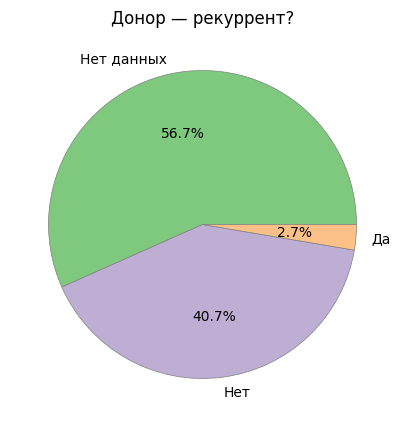

In [79]:
# круговая диаграмма
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(recurrents['donors'],
                                  labels=recurrents['recurrent'],
                                  autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',
                                  colors=plt.get_cmap('Accent').colors,
                                  textprops={'fontsize': 10})

# регулировка толщины границ сегментов
for wedge in wedges:
    wedge.set_edgecolor('grey')
    wedge.set_linewidth(0.5)

# заголовок
plt.title('Донор — рекуррент?')

plt.show()

Среди всех доноров $634$ являются рекуррентами, что составляет $2.7\%$ от всего пирога.\
$9$ $689$ ($40.7\%$) — не рекурренты.\
По $13$ $497$ донорам нет информации о их статусе, это $56.7\%$.

<br>

**Пол**

In [80]:
# сводная таблица
gender = donors_df['sex'].value_counts(dropna=False)\
                         .reset_index()\
                         .rename(columns={'count': 'donors'})\
                         .replace({np.NaN: 'Нет данных',
                                   'female': 'Женщин',
                                   'male': 'Мужчин'})
gender

,sex,donors
0,Женщин,14410
1,Нет данных,5105
2,Мужчин,4305


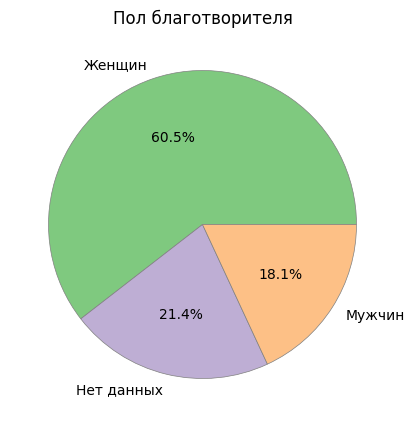

In [81]:
# круговая диаграмма
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(gender['donors'],
                                  labels=gender['sex'],
                                  autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',
                                  colors=plt.get_cmap('Accent').colors,
                                  textprops={'fontsize': 10})

# регулировка толщины границ сегментов
for wedge in wedges:
    wedge.set_edgecolor('grey')
    wedge.set_linewidth(0.5)

# заголовок
plt.title('Пол благотворителя')

plt.show()

Распределение доноров по полу таково:\
Женщин — $14410$ $(60.5\%)$\
Мужчин — $4305$ ($18.1\%$)\
Пол неизвестен — $5105$ $(21.4\%)$

Из чего можно сделать вывод, что женщины больше склонны к благотворительности.

<br>

**Регионы благотворителей**

Посмотрим распределение по регионам.

In [82]:
# сводная таблица
regions = donors_df['region_name'].value_counts(dropna=False)\
                                  .reset_index()\
                                  .rename(columns={'count': 'donors'})
# суммарное кол-во доноров
regions['total_donors'] = regions['donors'].sum()
# процент доноров по регионам
regions['region_percent'] = round(regions['donors'] / regions['total_donors'] * 100, 2)

regions

,region_name,donors,total_donors,region_percent
0,NaN,18776,23820,78.82
1,Vienna,2757,23820,11.57
2,Москва,997,23820,4.19
...,...,...,...,...
189,Peyrehorade,1,23820,0.00
190,Ханты-Мансийск,1,23820,0.00
191,Зеленоград,1,23820,0.00


<br>

Объединим малочисленные регионы в одну категорию.

In [83]:
# топ-4 региона по кол-ву доноров
top_regions = regions[['region_name', 'donors']].nlargest(4, 'donors')
# кол-во доноров из других регионов
others_sum = regions[['region_name', 'donors']]['donors'].sum() - top_regions['donors'].sum()
# остальные регионы по кол-ву доноров 
other_regions = pd.DataFrame({'region_name': 'Others',
                              'donors': [others_sum]})

# объединение топ-4 и остальных регионов
regions_pie = pd.concat([top_regions, other_regions])
# сортировка по кол-ву доноров
regions_pie = regions_pie.replace({np.NaN: 'Регион неизвестен',
                                   'Vienna': 'Вена',
                                   'Others': 'Другие регионы'})\
                         .sort_values(by='donors', ascending=False)
regions_pie

,region_name,donors
0,Регион неизвестен,18776
1,Вена,2757
0,Другие регионы,1080
2,Москва,997
3,Санкт-Петербург,210


<br>

Построим круговую диаграмму.

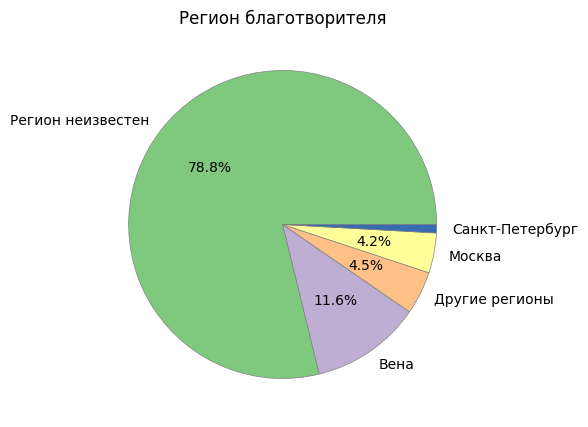

In [84]:
# круговая диаграмма
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(regions_pie['donors'],
                                  labels=regions_pie['region_name'],
                                  autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',
                                  colors=plt.get_cmap('Accent').colors,
                                  textprops={'fontsize': 10})

# регулировка толщины границ сегментов
for wedge in wedges:
    wedge.set_edgecolor('grey')
    wedge.set_linewidth(0.5)

# заголовок
plt.title('Регион благотворителя')

plt.show()

**География благотворителей**:
* Неизвестный регион — $18776$ доноров $(78.8\%)$
* Вена — $2757$ доноров $(11.6\%)$
* Другие регионы — $1080$ доноров $(4.5\%)$
* Москва — $997$ доноров $(4.2\%)$
* Санкт-Петербург — $210$ доноров $(0.9\%)$

Почему столько доноров именно из Вены? Почему столько неизвестных регионов? Непонятно. Очень похоже на какую-то ошибку.

<br>

**Даты**

In [85]:
first_date = donors_df['registration_or_redaction_date'].min()
last_date = donors_df['registration_or_redaction_date'].max()
difference = relativedelta(last_date, first_date)

print(f"Первая дата — {first_date}")
print(f"Последняя дата — {last_date}")

print(f"Временной промежуток — {difference.years} год, {difference.months} месяцев, {difference.days} дней.")

Первая дата — 2022-03-20 00:32:00
Последняя дата — 2024-03-18 13:51:00
Временной промежуток — 1 год, 11 месяцев, 27 дней.


Но вот что в точности значит эта колонка, непонятно.

<br>

Остальные колонки рассматривать не будем. Они показывают, подписаны ли доноры на информационные рассылки.

<br>

### Пожертвования

In [86]:
donations_df

,donation_id,action_id,donor_id,donation_date,touch_point,new_year_promotion,is_recurrent,repayment,donation_name,donation_amount,donation_status,hist_donor
0,18092,60971,15996,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,143,Paid,True
1,17590,60459,23047,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,100,Paid,True
2,18222,61106,18623,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,На уставную деятельность,2500,Paid,True
...,...,...,...,...,...,...,...,...,...,...,...,...
73760,154563,278441755,46787,2024-03-18 14:43:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,False
73761,154565,278455914,21389,2024-03-18 15:03:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,1000,Paid,True
73762,154564,278455869,46789,2024-03-18 15:03:00,Сайт,NaN,False,NaN,Пожертвование Благотворительный фонд «АиФ. Доб...,150,Paid,False


<br>

**Пожертвования**

Рассмотрим сами пожертвования.

In [87]:
# сводная таблица
donations = donations_df.pivot_table(index='donation_status', values='donation_id', aggfunc='count')\
                        .reset_index()\
                        .rename(columns={'donation_status': 'status',
                                         'donation_id': 'donations'})\
                        .sort_values(by='donations', ascending=False)\
                        .replace({'notpaid': 'Not paid',
                                  'fail': 'Fail'})

donations['total_attempts'] = donations['donations'].sum()

donations

,status,donations,total_attempts
0,Paid,52058,73763
2,Not paid,14852,73763
1,Fail,6853,73763


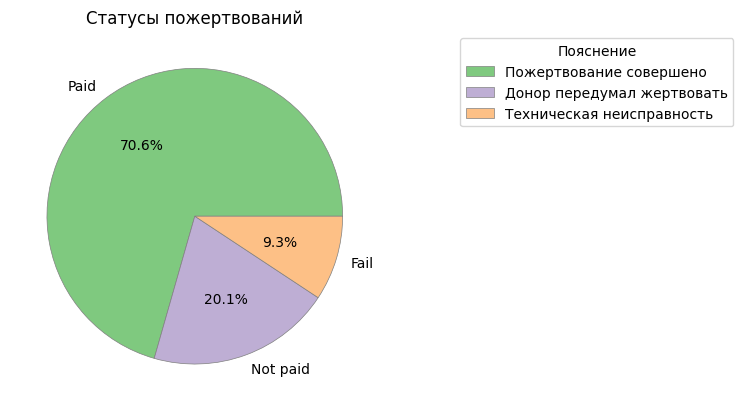

In [88]:
# круговая диаграмма
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(donations['donations'],
                                  labels=donations['status'],
                                  autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',
                                  colors=plt.get_cmap('Accent').colors,
                                  textprops={'fontsize': 10})

# регулировка толщины границ сегментов
for wedge in wedges:
    wedge.set_edgecolor('grey')
    wedge.set_linewidth(0.5)

# заголовок
plt.title('Статусы пожертвований')

# Создание легенды
custom_labels = ['Пожертвование совершено', 'Донор передумал жертвовать', 'Техническая неисправность']
plt.legend(wedges, custom_labels, title="Пояснение", bbox_to_anchor=(1.2, 1))

plt.show()

Всего было $73$ $763$ попытки сделать пожертвование. Из них:
* $52$ $058$ $(70.6\%)$ были успешно совершены. Это финальный этап воронки;
* В $14$ $852$ $(20.1\%)$ случаях донор не стал жертвовать: он выбрал кому помочь или на что пожертвовать, указал сумму, но по какой-то причине не сделал финальный клик.\
  Иначе говоря — это предпоследний этап воронки;
* И $6$ $853$ $(9.3\%)$ попыток обернулись неудачей из-за каких-то технических неполадок.

<br>

**Время пожертвования**

In [89]:
first_date = donations_df['donation_date'].min()
last_date = donations_df['donation_date'].max()
difference = relativedelta(last_date, first_date)

print(f"Первое пожертвование — {first_date}")
print(f"Последнее пожертвование — {last_date}")

print(f"Временной промежуток — {difference.years} года, {difference.months} месяца, {difference.days} дней.")

Первое пожертвование — 2021-01-01 03:00:00
Последнее пожертвование — 2024-03-18 15:03:00
Временной промежуток — 3 года, 2 месяца, 17 дней.


Теперь мы знаем, в течение какого времени благотворители жертвовали деньги фонду.

<br>

Посмотрим количество пожертвований в течение всего периода в разбивке по статусу платежа.

In [90]:
donation_status = donations_df.groupby([donations_df['donation_date'].dt.to_period('Q'), 'donation_status'])\
                              .agg(donations=('donation_id', 'count'))\
                              .reset_index()

donation_status['donation_date'] = donation_status['donation_date'].dt.to_timestamp()

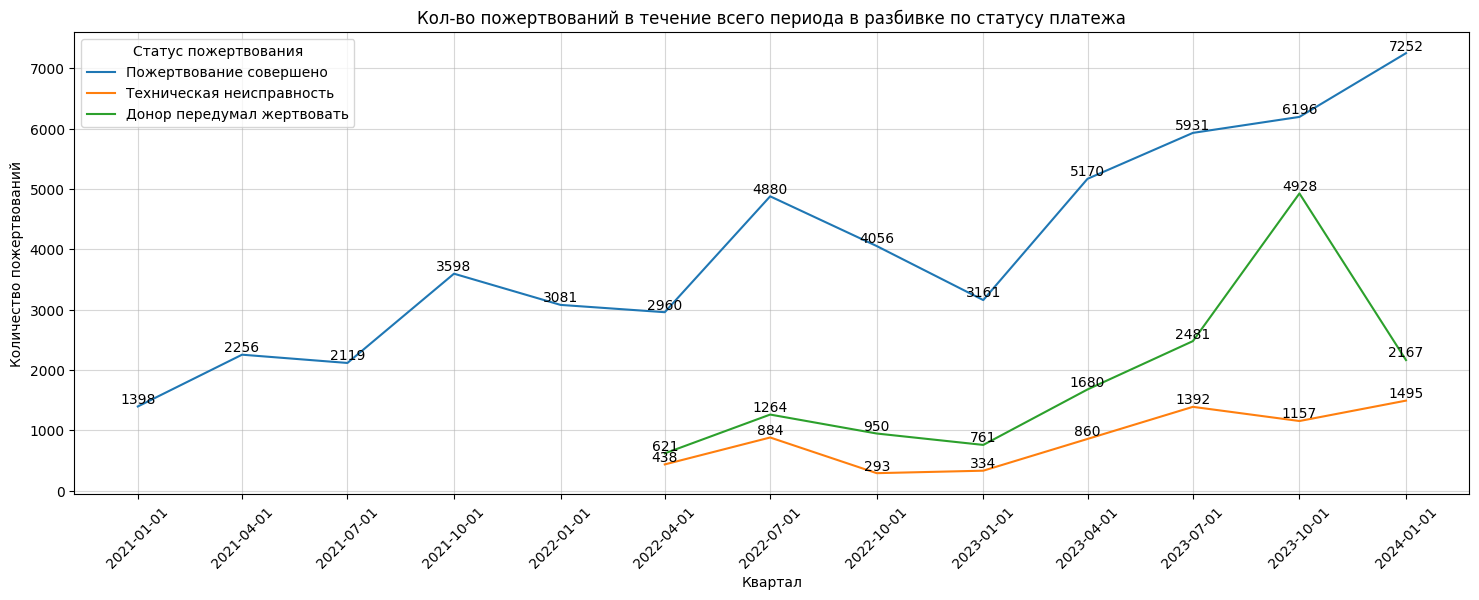

In [91]:
plt.figure(figsize=(18, 6))

# создание линейного графика
ax = sns.lineplot(data=donation_status, x='donation_date', y='donations', hue='donation_status')

# добавление числовых значений
for index, row in donation_status.iterrows():
    plt.text(row['donation_date'], row['donations'], str(row['donations']), ha='center', va='bottom')

plt.title('Кол-во пожертвований в течение всего периода в разбивке по статусу платежа')
plt.xlabel('Квартал')
plt.ylabel('Количество пожертвований')
xticks = donation_status['donation_date'].unique()
plt.xticks(ticks=xticks, rotation=45)

# легенда
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Пожертвование совершено', 'Техническая неисправность', 'Донор передумал жертвовать'], title='Статус пожертвования')

plt.grid(True, alpha=0.5)
plt.show()

Система начала регистрировать непройденные пожертвования только во втором квартале $2022$ года.

In [92]:
print(f"Дата отсчёта отменённых донорами пожертвований: {donations_df[donations_df['donation_status'] == 'notpaid']['donation_date'].min()}")

print(f"Дата отсчёта пожертовований, окончившимися технической неисправностью: {donations_df[donations_df['donation_status'] == 'fail']['donation_date'].min()}")

Дата отсчёта отменённых донорами пожертвований: 2022-04-07 05:55:00
Дата отсчёта пожертовований, окончившимися технической неисправностью: 2022-04-06 19:45:00


А если быть точнее, то с $6$ апреля $2022$ года.

<br>

**Точка контакта**

In [93]:
donations_df['touch_point'].value_counts(dropna=False)

touch_point
Сайт                             59453
Административный сайт Mindbox    14310
Name: count, dtype: int64

Всего две точки контакта. Там и делались пожертвования.

<br>

Как пожертвования в этих точках распределены по всему периоду времени?

In [94]:
touch_point_donations =  donations_df.groupby([donations_df['donation_date'].dt.to_period('Q'), 'touch_point'])\
                                     .agg(donations=('donation_id', 'count'))\
                                     .reset_index()

touch_point_donations['donation_date'] = touch_point_donations['donation_date'].dt.to_timestamp()

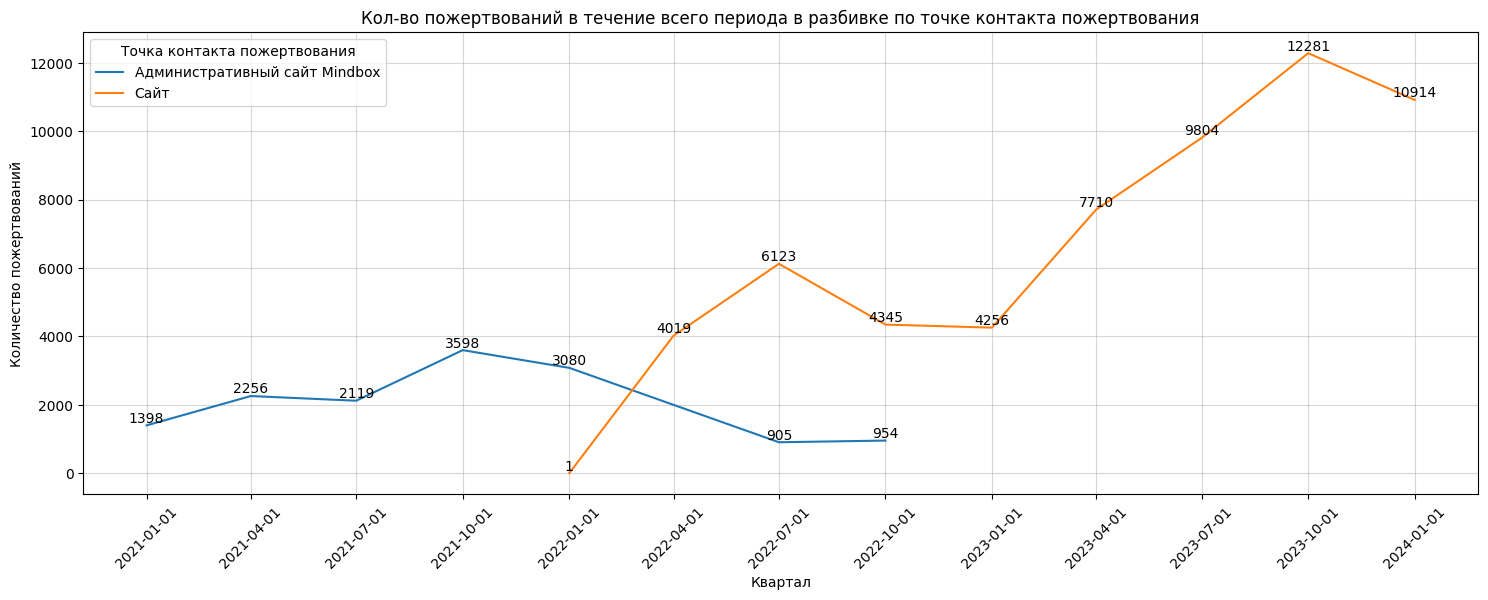

In [95]:
plt.figure(figsize=(18, 6))

# создание линейного графика
ax = sns.lineplot(data=touch_point_donations, x='donation_date', y='donations', hue='touch_point')

# добавление числовых значений
for index, row in touch_point_donations.iterrows():
    plt.text(row['donation_date'], row['donations'], str(row['donations']), ha='center', va='bottom')

plt.title('Кол-во пожертвований в течение всего периода в разбивке по точке контакта пожертвования')
plt.xlabel('Квартал')
plt.ylabel('Количество пожертвований')
xticks = donation_status['donation_date'].unique()
plt.xticks(ticks=xticks, rotation=45)

# легенда
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Административный сайт Mindbox', 'Сайт'], title='Точка контакта пожертвования')

plt.grid(True, alpha=0.5)
plt.show()

Мы видим, что в начале были пожертвования через Mindbox, а затем уже непосредственно через сайт благотворительного фонда.\
Также видно, что количество пожертвований каждый год росло.

Кроме того, мы получили ответ, почему система начала регистрировать непройденные пожертвования только во втором квартале $2022$ года.\
Потому что видно, что в это же время пожертвования стали оформляться через точку контакта "Сайт".

In [96]:
print(f"Дата отсчёта пожертвований, оформленных через точку 'Сайт': {donations_df[donations_df['touch_point'] == 'Сайт']['donation_date'].min()}.")

Дата отсчёта пожертвований, оформленных через точку 'Сайт': 2022-03-29 03:00:00.


<br>

In [97]:
donations_df[donations_df['touch_point'] == 'Административный сайт Mindbox']['donation_status'].value_counts(dropna=False)

donation_status
Paid    14310
Name: count, dtype: int64

И в самом деле, у пожертвований через Mindbox нет других пожертвований, кроме как со статусом `Paid`.

<br>

**Новогодняя кампания**

In [98]:
first_date = donations_df[donations_df['new_year_promotion'] == True]['donation_date'].min()
last_date = donations_df[donations_df['new_year_promotion'] == True]['donation_date'].max()
difference = relativedelta(last_date, first_date)

print(f"Первое пожертвование (начало кампании) — {first_date}")
print(f"Последнее пожертвование (конец кампании {last_date}")

print(f"Новогодняя кампания шла {difference.months} месяца и {difference.days} дней.")

Первое пожертвование (начало кампании) — 2023-11-13 11:13:00
Последнее пожертвование (конец кампании 2024-02-09 04:13:00
Новогодняя кампания шла 2 месяца и 26 дней.


<br>

Посмотрим картину лишь по тем пожертвованиям, которые успешно прошли.

In [99]:
new_year_donations = donations_df.query("new_year_promotion == True & donation_status == 'Paid'").groupby([donations_df['donation_date'].dt.to_period('W'), 'donation_status'])\
                                 .agg(donations=('donation_id', 'count'))\
                                 .reset_index()

new_year_donations['donation_date'] = new_year_donations['donation_date'].dt.to_timestamp()

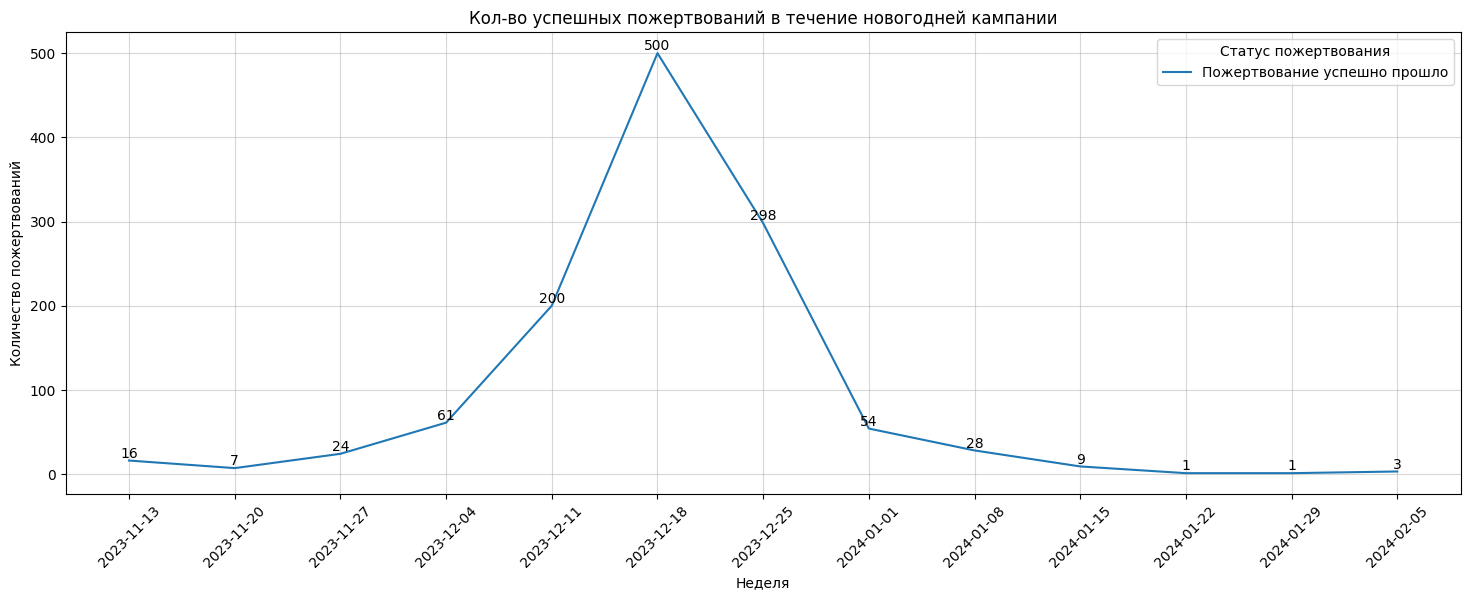

In [100]:
plt.figure(figsize=(18, 6))

# создание линейного графика
ax = sns.lineplot(data=new_year_donations, x='donation_date', y='donations', hue='donation_status')

# добавление числовых значений
for index, row in new_year_donations.iterrows():
    plt.text(row['donation_date'], row['donations'], str(row['donations']), ha='center', va='bottom')

plt.title('Кол-во успешных пожертвований в течение новогодней кампании')
plt.xlabel('Неделя')
plt.ylabel('Количество пожертвований')
xticks = new_year_donations['donation_date'].unique()
plt.xticks(ticks=xticks, rotation=45)

# легенда
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles=handles, labels=['Пожертвование успешно прошло'], title='Статус пожертвования')

plt.grid(True, alpha=0.5)
plt.show()

Здесь видно, что львиная доля пожертвований было сделано в декабре $2023$ года.

In [101]:
new_year_donations = donations_df.query("new_year_promotion == True & donation_status == 'Paid'").groupby([donations_df['donation_date'].dt.to_period('M'), 'donation_status'])\
                                 .agg(donations=('donation_id', 'count'))\
                                 .reset_index()

new_year_donations['donation_date'] = new_year_donations['donation_date'].dt.to_timestamp()
new_year_donations['total_donations'] = new_year_donations['donations'].sum()
new_year_donations['percent'] = round(new_year_donations['donations'] / new_year_donations['total_donations'] * 100, 2)
new_year_donations

,donation_date,donation_status,donations,total_donations,percent
0,2023-11-01,Paid,43,1202,3.58
1,2023-12-01,Paid,1063,1202,88.44
2,2024-01-01,Paid,93,1202,7.74
3,2024-02-01,Paid,3,1202,0.25


А именно, $88.4\%$ было сделано в декабре $2023$.

<br>

**Размер пожертвований**

Узнаем о размерах пожертвований.\
Для этого построим диаграмму размаха.

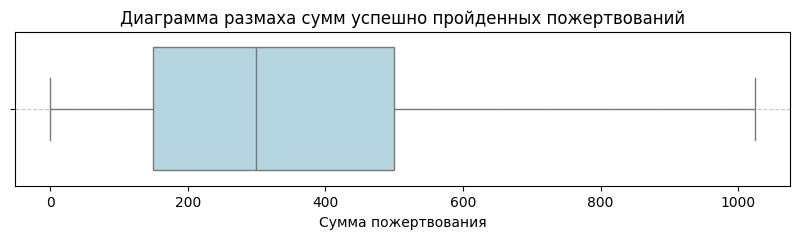

In [102]:
# Создание новой фигуры для диаграммы размаха с заданными размерами
plt.figure(figsize=(10, 2))

# Построение ящика с усами для продаж по платформам без выбросов с помощью seaborn
sns.boxplot(x=donations_df[donations_df['donation_status'] == 'Paid']['donation_amount'],
            showfliers=False,
            color='lightblue',  # Установка пастельного цвета
            orient='h')

# Настройка заголовка и меток к осям графика
plt.title('Диаграмма размаха сумм успешно пройденных пожертвований')
plt.xlabel('Сумма пожертвования')

# Добавление линий сетки только для оси y с пунктирным стилем и прозрачностью 0.7
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.show()

<br>

Расшифруем диаграмму.

In [103]:
# первый квартиль
Q1 = donations_df[donations_df['donation_status'] == 'Paid']['donation_amount'].quantile(0.25)
# третий квартиль 
Q3 = donations_df[donations_df['donation_status'] == 'Paid']['donation_amount'].quantile(0.75)
# межквартильный размах
IQR = Q3 - Q1
# нижняя граница
lower_bound = Q1 - 1.5 * IQR
# верхняя граница
upper_bound = Q3 + 1.5 * IQR
# кол-во нормальных значений
normal_values_count = len(donations_df[(donations_df['donation_amount'] >= lower_bound) & 
                                       (donations_df['donation_amount'] <= upper_bound) & 
                                       (donations_df['donation_status'] == 'Paid')])
# кол-во всех значений
total_paid_count = len(donations_df[donations_df['donation_status'] == 'Paid'])
# процент нормальных значений
normal_values_percentage = round(normal_values_count / total_paid_count * 100, 2)

In [104]:
print(f"Верхняя граница находится на отметке в {upper_bound} рублей.")
print(f"Боксплот показывает, что {normal_values_percentage}% пожертвований находится внутри диапазона 0 — {upper_bound} рублей — это диапазон 'нормальных' значений.")

Верхняя граница находится на отметке в 1025.0 рублей.
Боксплот показывает, что 89.4% пожертвований находится внутри диапазона 0 — 1025.0 рублей — это диапазон 'нормальных' значений.


А за пределами верхнего уса находятся пожертвования свыше $1025$ ₽, которые считаются выдающимися, нетипичными, иначе говоря — "выбросами", они составляют $10.6\%$ от всего количества пожертвований.

<br>

<span style="font-weight: 600">И сколько же денег принесли пожертвования "нормальные" и "выдающиеся"?</span>

In [105]:
# сумма "нормальных", 89.4% пожертвований 
normal_donations_sum = donations_df[(donations_df['donation_amount'] >= lower_bound) & 
                                    (donations_df['donation_amount'] <= upper_bound) & 
                                    (donations_df['donation_status'] == 'Paid')]['donation_amount'].sum()

normal_donations_count = donations_df[(donations_df['donation_amount'] >= lower_bound) & 
                                      (donations_df['donation_amount'] <= upper_bound) & 
                                      (donations_df['donation_status'] == 'Paid')]['donation_amount'].count()

print(f"Сумма 'нормальных', 89.4% пожертвований — {normal_donations_sum} ₽")
print(f"Количество 'нормальных', 89.4% пожертвований — {normal_donations_count}")

print('')

# сумма "выдающихся", 10.6% пожертвований 
extraordinary_donations_sum = donations_df[(donations_df['donation_amount'] > upper_bound) & 
                                           (donations_df['donation_status'] == 'Paid')]['donation_amount'].sum()
extraordinary_donations_count = donations_df[(donations_df['donation_amount'] > upper_bound) & 
                                             (donations_df['donation_status'] == 'Paid')]['donation_amount'].count()
print(f"Сумма 'выдающихся', 10.6% пожертвований — {extraordinary_donations_sum} ₽")
print(f"Количество 'выдающихся', 10.6% пожертвований — {extraordinary_donations_count}")

print('')


# вся сумма
all_the_donations_sum = normal_donations_sum + extraordinary_donations_sum

# процент, который составляет сумма "нормальных", 89.4% пожертвований
normal_donations_sum_perc = round(normal_donations_sum / all_the_donations_sum * 100, 2)
print(f"Процент, который составляет сумма 'нормальных', 89.4% пожертвований — {normal_donations_sum_perc}%")

# процент, который составляет сумма "выдающихся", 10.6% пожертвований
extraordinary_donations_sum_perc = round(extraordinary_donations_sum / all_the_donations_sum * 100, 2)
print(f"Процент, который составляет сумма 'выдающихся', 10.6% пожертвований — {extraordinary_donations_sum_perc}%")

Сумма 'нормальных', 89.4% пожертвований — 16023291 ₽
Количество 'нормальных', 89.4% пожертвований — 46540

Сумма 'выдающихся', 10.6% пожертвований — 23141024 ₽
Количество 'выдающихся', 10.6% пожертвований — 5518

Процент, который составляет сумма 'нормальных', 89.4% пожертвований — 40.91%
Процент, который составляет сумма 'выдающихся', 10.6% пожертвований — 59.09%


| Сумма нормальных пожертвований  | Количество нормальных пожертвований | Сумма выдающихся пожертвований  | Количество выдающихся пожертвований |
|:-------------------------------:|:-----------------------------------:|:-------------------------------:|:-----------------------------------:|
|$16$ $023$ $291$ руб. $(40.91\%)$|$46$ $540$ $(89.4\%)$                |$23$ $141$ $024$ руб. $(59.09\%)$|$5$ $518$ $(10.6\%)$                 |

Выходит, что $5518$ экстраординарных пожертвований принесли $59.09\%$ всех пожертвованных денег.\
Таких пожертвований не много, но они очень важны.

<br>

### Действия

In [106]:
actions_df

,action_id,donor_id,donor_rel_action,action_time,touch_point,utm_source,utm_medium,utm_campaign,hist_donor,don_money
0,60831,12997,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,True,True
1,60971,15996,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,True,True
2,60424,19356,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...
2864952,278407755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN,False,True
2864953,278409755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN,False,True
2864954,278409521,44209,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:12:00,Email,NaN,NaN,NaN,False,True


In [107]:
actions_df['donor_id'].nunique()

23820

Всего задействованы $23$ $820$ доноров.

In [108]:
# количество пересекающихся доноров в таблицах actions_df и donors_df
len(set(actions_df['donor_id']).intersection(set(donors_df['donor_id'])))

23820

Все они имеются в датасете в с донорами `donors_df`.

<br>

Посмотрим, как распространились действия в течение всего периода по кварталам.

In [109]:
actions_by_quarter = actions_df.groupby(actions_df['action_time'].dt.to_period('Q'))\
                               .agg(actions=('action_id', 'count'))\
                               .reset_index()

actions_by_quarter['action_time'] = actions_by_quarter['action_time'].dt.to_timestamp()

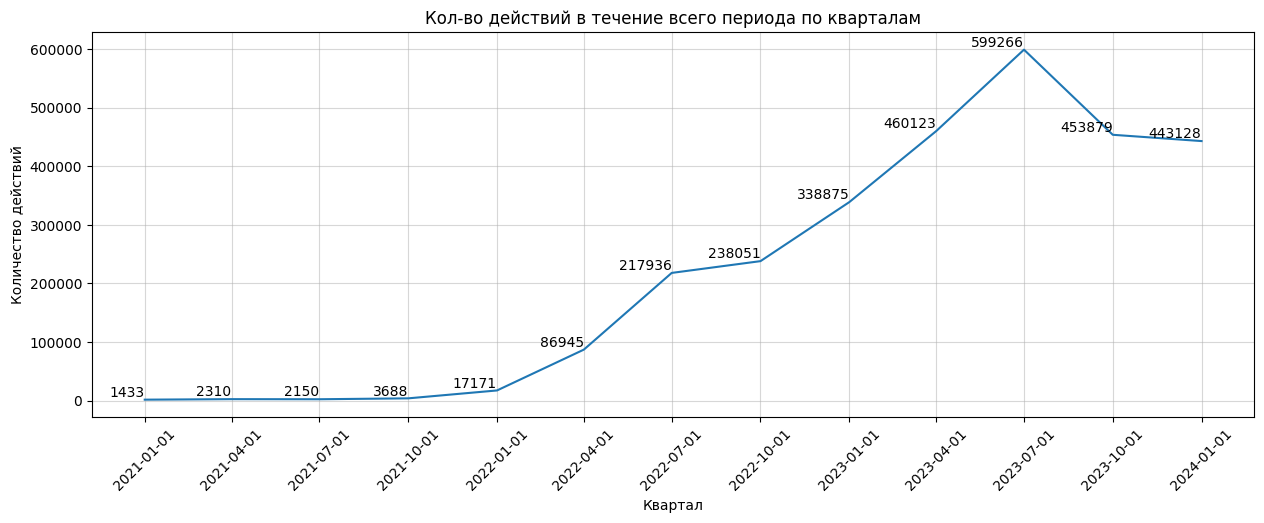

In [110]:
plt.figure(figsize=(15, 5))

# создание линейного графика
ax = sns.lineplot(data=actions_by_quarter, x='action_time', y='actions')

# добавление числовых значений
for index, row in actions_by_quarter.iterrows():
    plt.text(row['action_time'], row['actions'], str(row['actions']), ha='right', va='bottom')

plt.title('Кол-во действий в течение всего периода по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Количество действий')
xticks = actions_by_quarter['action_time'].unique()
plt.xticks(ticks=xticks, rotation=45)

plt.grid(True, alpha=0.5)
plt.show()

Теперь глянем, скольки уникальных благотворителей коснулись эти действия в течение всего периода в каждом квартале.

In [111]:
donors_by_quarter = actions_df.groupby(actions_df['action_time'].dt.to_period('Q'))\
                              .agg(donors=('donor_id', 'nunique'))\
                              .reset_index()

donors_by_quarter['action_time'] = donors_by_quarter['action_time'].dt.to_timestamp()

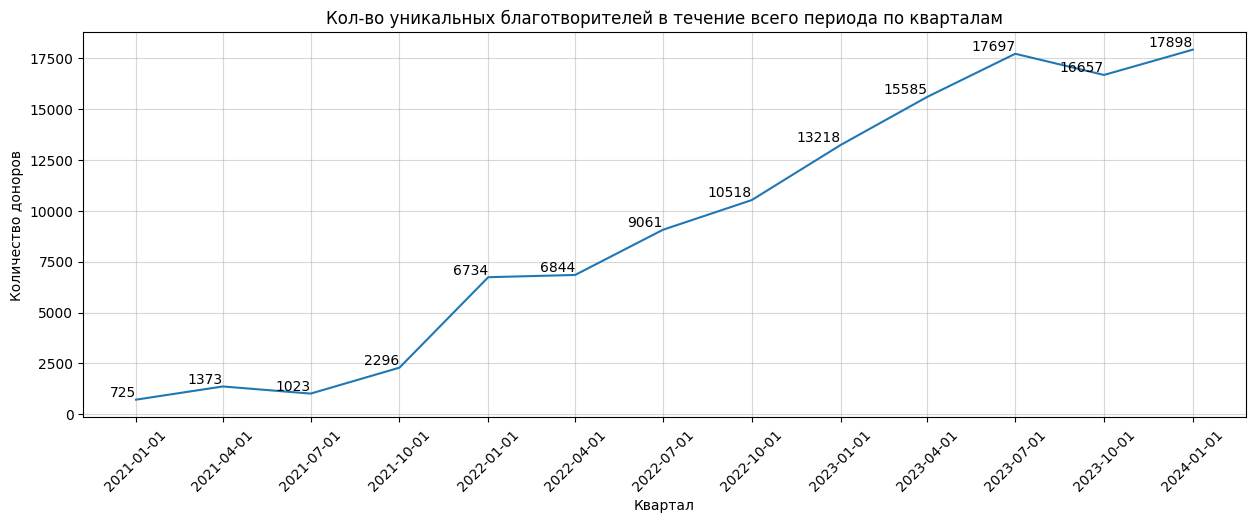

In [112]:
plt.figure(figsize=(15, 5))

# создание линейного графика
ax = sns.lineplot(data=donors_by_quarter, x='action_time', y='donors')

# добавление числовых значений
for index, row in donors_by_quarter.iterrows():
    plt.text(row['action_time'], row['donors'], str(row['donors']), ha='right', va='bottom')

plt.title('Кол-во уникальных благотворителей в течение всего периода по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Количество доноров')
xticks = actions_by_quarter['action_time'].unique()
plt.xticks(ticks=xticks, rotation=45)

plt.grid(True, alpha=0.5)
plt.show()

In [113]:
actions_df

,action_id,donor_id,donor_rel_action,action_time,touch_point,utm_source,utm_medium,utm_campaign,hist_donor,don_money
0,60831,12997,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,True,True
1,60971,15996,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,True,True
2,60424,19356,Оплата заказа,2021-01-01 03:00:00,Административный сайт Mindbox,NaN,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...
2864952,278407755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN,False,True
2864953,278409755,45062,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:09:00,Email,NaN,NaN,NaN,False,True
2864954,278409521,44209,Приглашение стать регулярным донором. Новый ша...,2024-03-18 14:12:00,Email,NaN,NaN,NaN,False,True


In [114]:
actions_df['touch_point'].value_counts()

touch_point
Email                            2130280
Сайт                              555151
Административный сайт Mindbox      71467
utm_term Не указан                 41572
Прямой переход                     34355
vk.com                              7673
yandex.ru                           6646
WebPush                             4690
google.com                          3532
instagram.com                       2252
roditeli                            1978
yoomoney.ru                         1367
razovie                              774
report                               729
lina                                 527
ida                                  469
ok.ru                                316
b24portal.dobroe-aif.ru              274
org.telegram.messenger               271
congratulations                      231
vse                                  213
first-stage                          188
Name: count, dtype: int64

<br>

<br>

## RFM-анализ

`RFM-анализ` — это анализ базы доноров на основе истории пожертвований путём сегментации по давности, частоте и сумме донаций.

* R — Recency (давность пожертвования) – давность последнего пожертвования;
* F — Frequency (частота пожертвований) — количество пожертвований;
* M — Monetary (сумма пожертвований) – сумма пожертвованных денег.

<br>

Для `RFM-анализа` будем использовать таблицу с пожертвованиями.\
Сначала нам нужно оставить только такие донации, которые действительно пришли в бюджет фонда. У них статус `Paid`.

In [115]:
paid_donations_df = donations_df[donations_df['donation_status'] == 'Paid']

<br>

Затем нужно установить дату отправной точки для анализа. От неё будет отсчитываться `R` критерий.\
Ею будет следующая дата после самой последней донации.

In [116]:
reference_date = paid_donations_df['donation_date'].max() + pd.Timedelta('1D')
reference_date

Timestamp('2024-03-19 15:03:00')

<br>

Сделаем таблицу, которая для каждого донора покажет:
* первую дату и время пожертвования;
* последнюю дату и время пожертвования;
* количество пожертвований;
* сумму пожертвований.

In [117]:
rfm = paid_donations_df.groupby('donor_id').agg(first_don_date=('donation_date', 'min'),
                                                last_don_date=('donation_date', 'max'),
                                                donations=('donation_id', 'count'),
                                                donated=('donation_amount', 'sum'))\
                                           .reset_index()

In [118]:
rfm

,donor_id,first_don_date,last_don_date,donations,donated
0,2734,2021-03-18 13:52:00,2021-10-14 18:50:00,2,51
1,2847,2021-06-17 02:10:00,2023-12-15 06:39:00,3,1000
2,2861,2021-03-16 15:24:00,2022-12-07 17:17:00,7,120
...,...,...,...,...,...
18718,46784,2024-03-18 10:25:00,2024-03-18 10:25:00,1,300
18719,46787,2024-03-18 14:43:00,2024-03-18 14:43:00,1,300
18720,46789,2024-03-18 15:03:00,2024-03-18 15:03:00,1,150


<br>

Создадим колонку, показывающую "время жизни" благотворителя в днях.\
Для этого из последней даты нужно вычесть первую.

In [119]:
# .dt.days преобразует разницу дат в дни, а добавление единицы корректирует период, включая обе даты
rfm['days_lifetime'] = (rfm['last_don_date'] - rfm['first_don_date']).dt.days + 1

In [120]:
rfm

,donor_id,first_don_date,last_don_date,donations,donated,days_lifetime
0,2734,2021-03-18 13:52:00,2021-10-14 18:50:00,2,51,211
1,2847,2021-06-17 02:10:00,2023-12-15 06:39:00,3,1000,912
2,2861,2021-03-16 15:24:00,2022-12-07 17:17:00,7,120,632
...,...,...,...,...,...,...
18718,46784,2024-03-18 10:25:00,2024-03-18 10:25:00,1,300,1
18719,46787,2024-03-18 14:43:00,2024-03-18 14:43:00,1,300,1
18720,46789,2024-03-18 15:03:00,2024-03-18 15:03:00,1,150,1


<br>

Вычислим `R-значение` (давность пожертвования).\
Для этого берём нашу отправную дату и из неё вычитаем дату последней донации для каждого благотворителя.

In [121]:
# .dt.days преобразует разницу дат в дни
rfm['r_val'] = (reference_date - rfm['last_don_date']).dt.days

In [122]:
rfm

,donor_id,first_don_date,last_don_date,donations,donated,days_lifetime,r_val
0,2734,2021-03-18 13:52:00,2021-10-14 18:50:00,2,51,211,886
1,2847,2021-06-17 02:10:00,2023-12-15 06:39:00,3,1000,912,95
2,2861,2021-03-16 15:24:00,2022-12-07 17:17:00,7,120,632,467
...,...,...,...,...,...,...,...
18718,46784,2024-03-18 10:25:00,2024-03-18 10:25:00,1,300,1,1
18719,46787,2024-03-18 14:43:00,2024-03-18 14:43:00,1,300,1,1
18720,46789,2024-03-18 15:03:00,2024-03-18 15:03:00,1,150,1,1


<br>

Мы уже вычислили `F-значение` (частоту пожертвований). — это колонка `donations`.

In [123]:
rfm['f_val'] = rfm['donations']

# удалим donations
rfm.drop(columns='donations', inplace=True)

<br>

`M-значение` (сумма пожертвований) уже также известно — это колонка `donated`.

In [124]:
rfm['m_val'] = rfm['donated']

# удалим donated
rfm.drop(columns='donated', inplace=True)

In [125]:
rfm

,donor_id,first_don_date,last_don_date,days_lifetime,r_val,f_val,m_val
0,2734,2021-03-18 13:52:00,2021-10-14 18:50:00,211,886,2,51
1,2847,2021-06-17 02:10:00,2023-12-15 06:39:00,912,95,3,1000
2,2861,2021-03-16 15:24:00,2022-12-07 17:17:00,632,467,7,120
...,...,...,...,...,...,...,...
18718,46784,2024-03-18 10:25:00,2024-03-18 10:25:00,1,1,1,300
18719,46787,2024-03-18 14:43:00,2024-03-18 14:43:00,1,1,1,300
18720,46789,2024-03-18 15:03:00,2024-03-18 15:03:00,1,1,1,150


<br>

**Сегментирование доноров**

**R-значение**

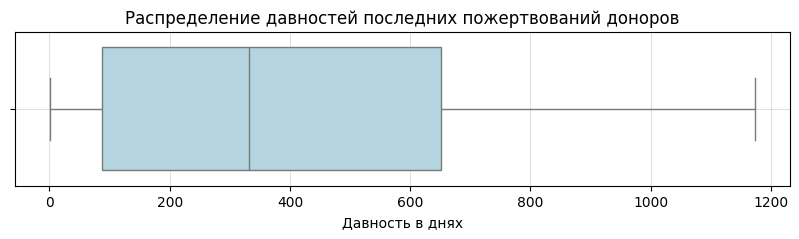

In [126]:
plt.figure(figsize=(10, 2))

sns.boxplot(x=rfm['r_val'],
            color='lightblue')

plt.title('Распределение давностей последних пожертвований доноров')
plt.xlabel('Давность в днях')

plt.grid(True, alpha=0.4)
plt.show()

<br>

Выдающихся значений на диаграмме размаха нет. Значит, эта колонка готова для сегментации.\
Поделим значения на три категории:
1. От нуля до $33$ перцентиля;
2. От $33$ перцентиля до $66$ перцентиля;
3. От $66$ перцентиля до максимального значения.

In [127]:
# список с границами категорий
r_bins = [0] + list(np.percentile(rfm['r_val'], [33, 66])) + [rfm['r_val'].max()]

# список названий категорий
r_labels = [3, 2, 1]

r_bins

[0, 165.0, 563.0, 1173]

<br>

Теперь создаём колонку `R`, которая разбивает все значения на $3$ равные категории.

In [128]:
rfm['R'] = pd.cut(rfm['r_val'], bins=r_bins, labels=r_labels, include_lowest=True)

<br>

<span style="font-weight: 600">Давность донаций по категориям:</span>\
$3$ — недавние $(0$ дней — $5$ месяцев, $12$ дней$)$\
$2$ — спящие $(5$ месяцев, $13$ дней — $1$ год, $6$ месяцев, $14$ дней$)$\
$1$ — давние $(1$ год, $6$ месяцев, $15$ дней — и более давние$)$

<br>

**F-значение**

Разобьём доноров по категориям в зависимости от частоты их пожертвований.

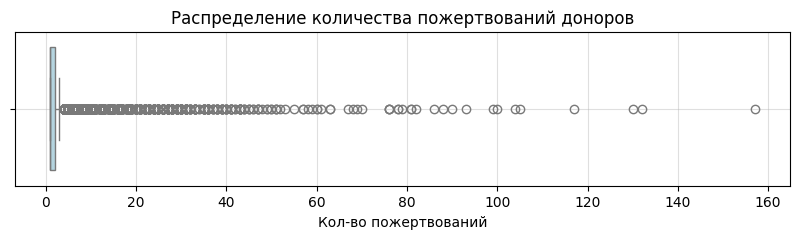

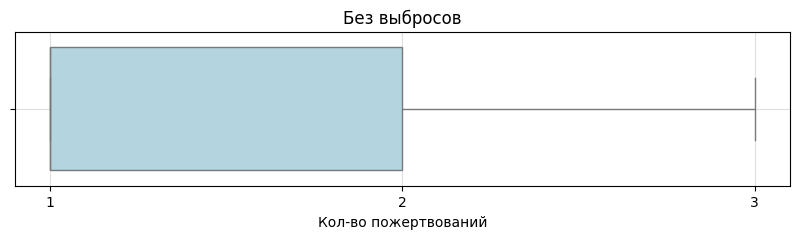

In [129]:
plt.figure(figsize=(10, 2))

sns.boxplot(x=rfm['f_val'],
            color='lightblue')

plt.title('Распределение количества пожертвований доноров')
plt.xlabel('Кол-во пожертвований')

plt.grid(True, alpha=0.4)

plt.figure(figsize=(10, 2))

sns.boxplot(x=rfm['f_val'],
            color='lightblue',
            showfliers=False)

plt.title('Без выбросов')
plt.xlabel('Кол-во пожертвований')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))  


plt.grid(True, alpha=0.4)
plt.show()

На первом боксплоте очень много выбросов.\
На втором мы избавились от них.

Интерпретируем диаграмму.

In [130]:
# три квартиля
f_q1, f_median, f_q3 = np.percentile(rfm['f_val'], [25, 50, 75])
# межквартильный размах
f_iqr = f_q3 - f_q1
# нижний ус
f_lower_bound = rfm['f_val'].min()
# верхний ус
f_upper_bound = f_q3 + 1.5 * f_iqr

# вывод
print(f"Первый квартиль: {f_q1.astype('int')}")
print(f"Медиана: {f_median.astype('int')}")
print(f"Третий квартиль: {f_q3.astype('int')}")
print(f"Межквартильный размах: {f_iqr.astype('int')}")
print(f"Нижний ус: {f_lower_bound}")
print(f"Верхний ус: {f_upper_bound}")

Первый квартиль: 1
Медиана: 1
Третий квартиль: 2
Межквартильный размах: 1
Нижний ус: 1
Верхний ус: 3.5


<br>

Теперь вынесем все значения, которые находятся в пределах нижнего и верхнего уса боксплота, в список.

In [131]:
f_typical = rfm[rfm['f_val'] < f_upper_bound]['f_val'].tolist()

<br>

Поделим значения на три категории:
1. От нуля до $33$ перцентиля;
2. От $33$ перцентиля до $66$ перцентиля;
3. От $66$ перцентиля до максимального значения.

In [132]:
# список с границами категорий
f_bins = [0] + list(np.percentile(f_typical, [33, 66])) + [rfm['f_val'].max()]

# список названий категорий
f_labels = [3, 2, 1]

f_bins

[0, 1.0, 1.0, 157]

Получилось не то, что нужно.\
Видим, что максимальное число пожертвований — $157$.

Посмотрим распределение кол-ва донаций в другом виде.

In [133]:
rfm['f_val'].value_counts().head(15)

f_val
1     12899
2      2233
3       883
4       526
5       367
6       243
7       172
8       167
9       112
10      107
15       88
14       86
11       86
12       77
13       66
Name: count, dtype: int64

<br>

А что если посмотреть кол-во пожертвований по следующим срезам?

In [134]:
first_f = rfm[rfm['f_val'] == 1]['f_val'].count()
second_f = rfm[rfm['f_val'].between(2, 3)]['f_val'].count()
third_f = rfm[rfm['f_val'].between(4, rfm['f_val'].max())]['f_val'].count()

print(f"Число доноров, совершивших одно пожертвование: {first_f}")
print(f"Число доноров, совершивших от двух до трёх пожертвований: {second_f}")
print(f"Число доноров, совершивших от четырёх и выше пожертвований: {third_f}")

Число доноров, совершивших одно пожертвование: 12899
Число доноров, совершивших от двух до трёх пожертвований: 3116
Число доноров, совершивших от четырёх и выше пожертвований: 2706


<br>

И подсчитать проценты по каждому из них?

In [135]:
first_f_perc = round(12899 / (12899 + 3116 + 2706) * 100, 2)
second_f_perc = round(3116 / (12899 + 3116 + 2706) * 100, 2)
third_f_perc = round(2706 / (12899 + 3116 + 2706) * 100, 2)

print(f"Процент доноров, совершивших одно пожертвование: {first_f_perc}%")
print(f"Процент доноров, совершивших от двух до трёх пожертвований: {second_f_perc}%")
print(f"Процент доноров, совершивших от четырёх и выше пожертвований: {third_f_perc}%")

Процент доноров, совершивших одно пожертвование: 68.9%
Процент доноров, совершивших от двух до трёх пожертвований: 16.64%
Процент доноров, совершивших от четырёх и выше пожертвований: 14.45%


<br>

Сегменты можно разбить по следующим категориям:
1. $1$ пожертвование
2. от $2$ до $3$ пожертвований
3. от $4$ до максимального кол-ва пожертвований.

Думаю, это лучшее решение в данной ситуации. 

<br>

In [136]:
# список с границами категорий
f_bins = [0, 1, 3, rfm['f_val'].max()]

# список названий категорий
f_labels = [1, 2, 3]

f_bins

[0, 1, 3, 157]

<br>

Теперь создаём колонку `F`, которая разбивает все значения на $3$ равные категории.

In [137]:
rfm['F'] = pd.cut(rfm['f_val'], bins=f_bins, labels=f_labels, include_lowest=True)

<br>

<span style="font-weight: 600">Итак, частота пожертвований по категориям:</span>\
$3$ — частые (от $4$ до макс. кол-ва пожертвований);\
$2$ — редкие (от $2$ до $3$ пожертвований);\
$1$ — разовые ($1$ пожертвование).

<br>

**M-значение**

Теперь поделим благотворителей по категориям в зависимости от суммы их пожертвований.

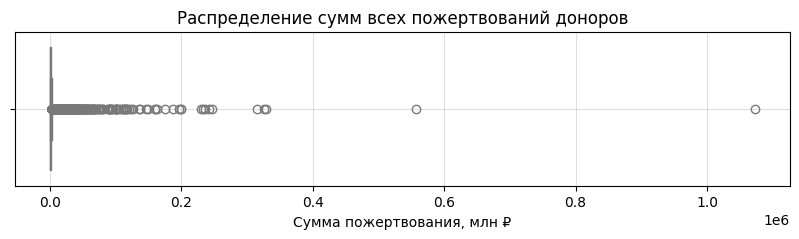

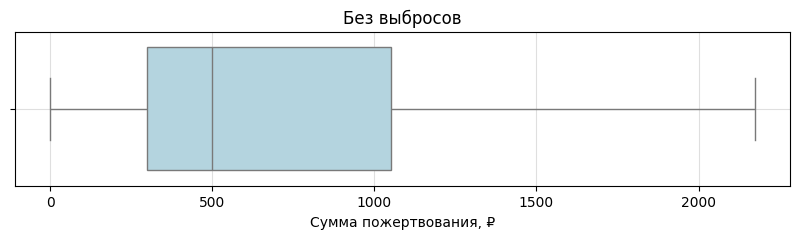

In [138]:
# диаграмма размаха с выбросами
plt.figure(figsize=(10, 2))

sns.boxplot(x=rfm['m_val'],
            color='lightblue')

plt.title('Распределение сумм всех пожертвований доноров')
plt.xlabel('Сумма пожертвования, млн ₽')

plt.grid(True, alpha=0.4)

# диаграмма размаха без выбросов
plt.figure(figsize=(10, 2))

sns.boxplot(x=rfm['m_val'],
            color='lightblue',
            showfliers=False)

plt.title('Без выбросов')
plt.xlabel('Сумма пожертвования, ₽')

plt.grid(True, alpha=0.4)

plt.show()

Мы видим героя, который пожертвовал более миллиона рублей за всё своё время нахождения с фондом.

На первом боксплоте также видим очень много приятных для фонда (и человечества) выбросов.\
На втором мы их скрыли.

<br>

Интерпретируем диаграмму.

In [139]:
# три квартиля
m_q1, m_median, m_q3 = np.percentile(rfm['m_val'], [25, 50, 75])
# межквартильный размах
m_iqr = m_q3 - m_q1
# нижний ус
m_lower_bound = rfm['m_val'].min()
# верхний ус
m_upper_bound = m_q3 + 1.5 * m_iqr

# вывод
print(f"Первый квартиль: {m_q1.astype('int')}")
print(f"Медиана: {m_median.astype('int')}")
print(f"Третий квартиль: {m_q3.astype('int')}")
print(f"Межквартильный размах: {m_iqr.astype('int')}")
print(f"Нижний ус: {m_lower_bound}")
print(f"Верхний ус: {m_upper_bound}")

Первый квартиль: 300
Медиана: 500
Третий квартиль: 1050
Межквартильный размах: 750
Нижний ус: 0
Верхний ус: 2175.0


<br>

Поделим значения на три категории:
1. От нуля до $33$ перцентиля;
2. От $33$ перцентиля до $66$ перцентиля;
3. От $66$ перцентиля до максимального значения.

Какие значения по категориям нам предложит метод `np.percentile()`, если использовать не очищенный от выбросов набор данных?

In [140]:
# список с границами категорий
m_bins = [0] + list(np.percentile(rfm['m_val'], [33, 66])) + [rfm['m_val'].max()]

# список названий категорий
m_labels = [1, 2, 3]

m_bins

[0, 300.0, 950.0, 1072500]

А сколько доноров в каждой категории?

In [141]:
first_m = rfm[rfm['m_val'] <= 300]['m_val'].count()
second_m = rfm[rfm['m_val'].between(301, 950)]['m_val'].count()
third_m = rfm[rfm['m_val'].between(951, rfm['m_val'].max())]['m_val'].count()
sum_m_cat = first_m + second_m + third_m 

print(f"Число доноров, пожертвовавших 300 и менее рублей: {first_m}")
print(f"Число доноров, пожертвовавших от 301 до 950 рублей: {second_m}")
print(f"Число доноров, пожертвовавших от 951 рублей и до максимального пожертвования: {third_m}")

Число доноров, пожертвовавших 300 и менее рублей: 7224
Число доноров, пожертвовавших от 301 до 950 рублей: 5139
Число доноров, пожертвовавших от 951 рублей и до максимального пожертвования: 6358


Процентное соотношение в этих категориях.

In [142]:
first_m_perc = round(first_m / sum_m_cat * 100, 2)
second_m_perc = round(second_m / sum_m_cat * 100, 2)
third_m_perc = round(third_m / sum_m_cat * 100, 2)

print(f"Процент доноров, пожертвовавших 300 и менее рублей: {first_m_perc}%")
print(f"Процент доноров, пожертвовавших от 301 до 950 рублей: {second_m_perc}%")
print(f"Процент доноров, пожертвовавших от 951 рублей и до максимального пожертвования: {third_m_perc}%")

Процент доноров, пожертвовавших 300 и менее рублей: 38.59%
Процент доноров, пожертвовавших от 301 до 950 рублей: 27.45%
Процент доноров, пожертвовавших от 951 рублей и до максимального пожертвования: 33.96%


Проценты нормальные. По крайней мере распределение у них ровнее, чем если очистить набор данных от выбросов.\
Я это проверил за кулисами.

<br>

Теперь создадим колонку `M`, которая разбивает все значения на $3$ равные категории.

In [143]:
rfm['M'] = pd.cut(rfm['m_val'], bins=m_bins, labels=m_labels, include_lowest=True)

<br>

In [144]:
rfm

,donor_id,first_don_date,last_don_date,days_lifetime,r_val,f_val,m_val,R,F,M
0,2734,2021-03-18 13:52:00,2021-10-14 18:50:00,211,886,2,51,1,2,1
1,2847,2021-06-17 02:10:00,2023-12-15 06:39:00,912,95,3,1000,3,2,3
2,2861,2021-03-16 15:24:00,2022-12-07 17:17:00,632,467,7,120,2,3,1
...,...,...,...,...,...,...,...,...,...,...
18718,46784,2024-03-18 10:25:00,2024-03-18 10:25:00,1,1,1,300,3,1,1
18719,46787,2024-03-18 14:43:00,2024-03-18 14:43:00,1,1,1,300,3,1,1
18720,46789,2024-03-18 15:03:00,2024-03-18 15:03:00,1,1,1,150,3,1,1


<span style="font-weight: 600">Итак, сумма пожертвований по категориям:</span>\
$3$ — высокая (от $951$ рубля и выше);\
$2$ — средняя(от $301$ до $950$ рублей);\
$1$ — низкая ($300$ рублей и меньше).

<br>

Теперь сложим все три критерия как строки.

In [145]:
rfm['RFM'] = rfm['R'].astype('str') + \
             rfm['F'].astype('str') + \
             rfm['M'].astype('str')

In [146]:
rfm

,donor_id,first_don_date,last_don_date,days_lifetime,r_val,f_val,m_val,R,F,M,RFM
0,2734,2021-03-18 13:52:00,2021-10-14 18:50:00,211,886,2,51,1,2,1,121
1,2847,2021-06-17 02:10:00,2023-12-15 06:39:00,912,95,3,1000,3,2,3,323
2,2861,2021-03-16 15:24:00,2022-12-07 17:17:00,632,467,7,120,2,3,1,231
...,...,...,...,...,...,...,...,...,...,...,...
18718,46784,2024-03-18 10:25:00,2024-03-18 10:25:00,1,1,1,300,3,1,1,311
18719,46787,2024-03-18 14:43:00,2024-03-18 14:43:00,1,1,1,300,3,1,1,311
18720,46789,2024-03-18 15:03:00,2024-03-18 15:03:00,1,1,1,150,3,1,1,311


И получим $27$ сегментов.

Описание рангов:
* $3$ — хорошо;
* $2$ — средне;
* $1$ — плохо.

<span style="font-weight: 600">Давность донаций по категориям:</span>\
$3$ — недавние $(0$ дней — $5$ месяцев, $12$ дней$)$\
$2$ — спящие $(5$ месяцев, $13$ дней — $1$ год, $6$ месяцев, $14$ дней$)$\
$1$ — давние $(1$ год, $6$ месяцев, $15$ дней — и более давние$)$

<span style="font-weight: 600">Частота пожертвований по категориям:</span>\
$3$ — частые (от $4$ до макс. кол-ва пожертвований);\
$2$ — редкие (от $2$ до $3$ пожертвований);\
$1$ — разовые ($1$ пожертвование).

<span style="font-weight: 600">Сумма пожертвований по категориям:</span>\
$3$ — высокая (от $951$ рубля и выше);\
$2$ — средняя (от $301$ до $950$ рублей);\
$1$ — низкая ($300$ рублей и меньше).

Сумма рангов в сегменте отражает показатель важности этого самого сегмента.\
Субъективно: зададим исключение — каждый старший ранг в `R` критерии даёт дополнительный $0.5$ балл сверху: 
* допустим, если сегмент начинается с цифры $2$, то R критерий даст $1.5$ балла
* если с цифры $3$, то R критерий даст $2$ балла.

Всё-таки показатель недавности благотворителя кажется чуть более важным.

|Ранг/Показатель|R|F|M|
|:--:|:--:|:--:|:--:|
|$3$|Жертвовал не позже 165 дней назад|Делал больше трёх пожертвований|Сумма пожертвований больше $951$ ₽|
|$2$|Жертвовал не раньше 166 дней и не позже полутора лет назад|Делал от двух до трёх пожертвований|Сумма пожертвований в диапазоне $301-950$ ₽|
|$1$|Жертвовал более полутора лет назад|Жертвовал лишь единожды|Жертвовал менее $300$ рублей|

| Сегмент | Название (Баллы)             | Описание                                                                                             |
|:-------:|:---------------------|:-----------------------------------------------------------------------------------------------------|
| 333     | **Главный VIP** $(10)$             | Жертвовал не позже 165 дней назад, Делал больше четырёх пожертвований, Сумма пожертвований больше 951 ₽ |
| 332     | **Опорный** $(9)$            | Жертвовал не позже 165 дней назад, Делал больше четырёх пожертвований, Сумма пожертвований в диапазоне 301-950 ₽ |
| 331     | **Дюжий** $(8)$    | Жертвовал не позже 165 дней назад, Делал больше четырёх пожертвований, Жертвовал менее 300 ₽        |
| 323     | **Опорный** $(9)$      | Жертвовал не позже 165 дней назад, Делал от двух до трёх пожертвований, Сумма пожертвований больше 951 ₽ |
| 322     | **Дюжий** $(8)$           | Жертвовал не позже 165 дней назад, Делал от двух до трёх пожертвований, Сумма пожертвований в диапазоне 301-950 ₽ |
| 321     | **Новый** $(7)$ | Жертвовал не позже 165 дней назад, Делал от двух до трёх пожертвований, Жертвовал менее 300 ₽       |
| 313     | **Крупный новый** $(8)$          | Жертвовал не позже 165 дней назад, Жертвовал лишь единожды, Сумма пожертвований больше 951 ₽        |
| 312     | **Новый** $(7)$             | Жертвовал не позже 165 дней назад, Жертвовал лишь единожды, Сумма пожертвований в диапазоне 301-950 ₽ |
| 311     | **Новый** $(6)$    | Жертвовал не позже 165 дней назад, Жертвовал лишь единожды, Жертвовал менее 300 ₽                   |
| 233     | **VIP** $(8.5)$        | Жертвовал не раньше 166 дней и не позже полутора лет назад, Делал больше четырёх пожертвований, Сумма пожертвований больше 951 ₽ |
| 232     | **Лояльный** $(7.5)$            | Жертвовал не раньше 166 дней и не позже полутора лет назад, Делал больше четырёх пожертвований, Сумма пожертвований в диапазоне 301-950 ₽ |
| 231     | **Середняк** $(6.5)$  | Жертвовал не раньше 166 дней и не позже полутора лет назад, Делал больше четырёх пожертвований, Жертвовал менее 300 ₽ |
| 223     | **Лояльный** $(7.5)$      | Жертвовал не раньше 166 дней и не позже полутора лет назад, Делал от двух до трёх пожертвований, Сумма пожертвований больше 951 ₽ |
| 222     | **Середняк** $(6.5)$          | Жертвовал не раньше 166 дней и не позже полутора лет назад, Делал от двух до трёх пожертвований, Сумма пожертвований в диапазоне 301-950 ₽ |
| 221     | **Редкий** $(5.5)$| Жертвовал не раньше 166 дней и не позже полутора лет назад, Делал от двух до трёх пожертвований, Жертвовал менее 300 ₽ |
| 213     | **Крупный редкий** $(6.5)$         | Жертвовал не раньше 166 дней и не позже полутора лет назад, Жертвовал лишь единожды, Сумма пожертвований больше 951 ₽ |
| 212     | **Редкий** $(5.5)$             | Жертвовал не раньше 166 дней и не позже полутора лет назад, Жертвовал лишь единожды, Сумма пожертвований в диапазоне 301-950 ₽ |
| 211     | **Редкий** $(4.5)$   | Жертвовал не раньше 166 дней и не позже полутора лет назад, Жертвовал лишь единожды, Жертвовал менее 300 ₽ |
| 133     | **VIP в прошлом** $(7)$          | Жертвовал более полутора лет назад, Делал больше четырёх пожертвований, Сумма пожертвований больше 951 ₽ |
| 132     | **Лояльный в прошлом** $(6)$              | Жертвовал более полутора лет назад, Делал больше четырёх пожертвований, Сумма пожертвований в диапазоне 301-950 ₽ |
| 131     | **Почти потерян** $(5)$    | Жертвовал более полутора лет назад, Делал больше четырёх пожертвований, Жертвовал менее 300 ₽       |
| 123     | **Лояльный в прошлом** $(6)$      | Жертвовал более полутора лет назад, Делал от двух до трёх пожертвований, Сумма пожертвований больше 951 ₽ |
| 122     | **Почти потерян** $(5)$          | Жертвовал более полутора лет назад, Делал от двух до трёх пожертвований, Сумма пожертвований в диапазоне 301-950 ₽ |
| 121     | **Ушедший** $(4)$| Жертвовал более полутора лет назад, Делал от двух до трёх пожертвований, Жертвовал менее 300 ₽      |
| 113     | **Крупный ушедший** $(5)$          | Жертвовал более полутора лет назад, Жертвовал лишь единожды, Сумма пожертвований больше 951 ₽       |
| 112     | **Ушедший** $(4)$              | Жертвовал более полутора лет назад, Жертвовал лишь единожды, Сумма пожертвований в диапазоне 301-950 ₽ |
| 111     | **Ушедший** $(3)$    | Жертвовал более полутора лет назад, Жертвовал лишь единожды, Жертвовал менее 300 ₽                   |


Дадим каждому сегменту название и их баллы.

In [147]:
# названия сегментов
def name_segment(segment):
    if segment in ['111', '112', '121']:
        return 'Ушедший'
    elif segment in ['113']:
        return 'Крупный ушедший'
    elif segment in ['122', '131']:
        return 'Почти потерян'
    elif segment in ['123', '132']:
        return 'Лояльный в прошлом'
    elif segment in ['133']:
        return 'VIP в прошлом'
    elif segment in ['211', '212', '221']:
        return 'Редкий'
    elif segment in ['213']:
        return 'Крупный редкий'
    elif segment in ['222', '231']:
        return 'Середняк'
    elif segment in ['223', '232']:
        return 'Лояльный'
    elif segment in ['233']:
        return 'VIP'
    elif segment in ['311', '312', '321']:
        return 'Новый'
    elif segment in ['313']:
        return 'Крупный новый'
    elif segment in ['322', '331']:
        return 'Дюжий'
    elif segment in ['323', '332']:
        return 'Опорный'
    elif segment in ['333']:
        return 'Главный VIP'
    else:
        return 'Неопознанный'

rfm['segment_name'] = rfm['RFM'].apply(name_segment)

In [148]:
# баллы сегментов
def segment_mark(segment):
    # проверяем, содержит ли segment цифры из списка
    if segment == '111':
        return 3
    elif segment in ['112', '121']:
        return 4
    elif segment == '211':
        return 4.5
    elif segment in ['113', '122', '131']:
        return 5
    elif segment in ['212', '221']:
        return 5.5
    elif segment in ['123', '132', '311']:
        return 6
    elif segment in ['213', '222', '231']:
        return 6.5
    elif segment in ['133', '312', '321']:
        return 7
    elif segment in ['223', '232']:
        return 7.5
    elif segment in ['313', '322', '331']:
        return 8
    elif segment == '233':
        return 8.5
    elif segment in ['323', '332']:
        return 9
    elif segment == '333':
        return 10
    else:
        return 404

rfm['segment_mark'] = rfm['RFM'].apply(segment_mark)

In [149]:
rfm.sample(10)

,donor_id,first_don_date,last_don_date,days_lifetime,r_val,f_val,m_val,R,F,M,RFM,segment_name,segment_mark
16423,43832,2024-01-02 06:08:00,2024-02-09 13:54:00,39,39,2,200,3,2,1,321,Новый,7.0
17217,44890,2024-02-02 16:25:00,2024-02-02 16:25:00,1,45,1,1029,3,1,3,313,Крупный новый,8.0
18371,46316,2024-03-03 15:27:00,2024-03-03 15:27:00,1,15,1,500,3,1,2,312,Новый,7.0
8293,31423,2022-08-23 19:52:00,2023-12-18 15:56:00,482,91,6,3215,3,3,3,333,Главный VIP,10.0
10630,35224,2023-04-02 23:42:00,2023-04-02 23:42:00,1,351,1,120,2,1,1,211,Редкий,4.5
8537,31753,2022-09-03 17:28:00,2022-09-03 17:28:00,1,562,1,50,2,1,1,211,Редкий,4.5
18441,46415,2024-03-06 15:02:00,2024-03-06 15:02:00,1,13,1,300,3,1,1,311,Новый,6.0
226,10233,2021-08-22 03:00:00,2021-08-22 03:00:00,1,940,1,500,1,1,2,112,Ушедший,4.0
5898,26972,2022-05-12 10:22:00,2022-05-12 10:22:00,1,677,1,500,1,1,2,112,Ушедший,4.0
17714,45502,2024-02-09 18:30:00,2024-03-04 15:53:00,24,14,2,450,3,2,2,322,Дюжий,8.0


In [150]:
rfm.groupby(['RFM', 'segment_name', 'segment_mark'])['m_val'].agg('sum').reset_index()

,RFM,segment_name,segment_mark,m_val
0,111,Ушедший,3.0,510242
1,112,Ушедший,4.0,728303
2,113,Крупный ушедший,5.0,3628304
3,121,Ушедший,4.0,33406
4,122,Почти потерян,5.0,143053
5,123,Лояльный в прошлом,6.0,1344995
6,131,Почти потерян,5.0,2093
7,132,Лояльный в прошлом,6.0,29612
8,133,VIP в прошлом,7.0,1787955
9,211,Редкий,4.5,465863
